# Exploratory Data Analysis

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load Data

In [ ]:
# read file csv into dataframe
df = pd.read_csv('Travel.csv')

In [ ]:
# menambahkan kolom revenue berdasarkan tipe paket dan harga paket sesuai asumsi kelompok
revenue = pd.DataFrame({'ProductPitched':['Basic', 'Standard','Deluxe', 'Super Deluxe', 'King'],
                       'Revenue':[100,200,300,400,500]})
revenue

,ProductPitched,Revenue
0,Basic,100
1,Standard,200
2,Deluxe,300
3,Super Deluxe,400
4,King,500


In [ ]:
df = df.merge(revenue,how='left',on='ProductPitched')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Revenue
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,300
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,300
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,100
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,100
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,100


## Descriptive Statistics

In [ ]:
# view info attributes and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Data Insight**

Dari info di atas diketahui bahwa:
- Data terdiri dari 4888 baris dan 20 kolom (14 kolom numerik dan 6 kolom kategorik).
- Terdapat beberapa kolom yang memiliki nilai null/missing values (non-null count < total baris). Kolom tersebut yaitu Age, TypeofContact, TypeofContact, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome. 
- Penamaan kolom dan tipe data terlihat sudah sesuai.

In [ ]:
def preprocessing(df):
    """"
    Objective :
    Function for preprocessing data, known missing, duplicated values and basic stastics every column in dataframe and duplicated row
    df is dataframe
    """
    try:
        import pandas as pd
        variables = pd.DataFrame(columns=['Variable','Number of unique values','Percent of Null(%)','Number of Null','Type','Values'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum()/df.shape[0]*100,df[var].isnull().sum(),df[var].dtypes,df[var].unique()]
        return (variables.set_index('Variable'))
    except:
        print('ada kesalahan penginputan')

In [ ]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Null,Type,Values
Variable,,,,,
CustomerID,4888,0.000000,0,int64,"[200000, 200001, 200002, 200003, 200004, 20000..."
ProdTaken,2,0.000000,0,int64,"[1, 0]"
Age,44,4.623568,226,float64,"[41.0, 49.0, 37.0, 33.0, nan, 32.0, 59.0, 30.0..."
TypeofContact,2,0.511457,25,object,"[Self Enquiry, Company Invited, nan]"
CityTier,3,0.000000,0,int64,"[3, 1, 2]"
DurationOfPitch,34,5.135025,251,float64,"[6.0, 14.0, 8.0, 9.0, 30.0, 29.0, 33.0, 22.0, ..."
Occupation,4,0.000000,0,object,"[Salaried, Free Lancer, Small Business, Large ..."
Gender,3,0.000000,0,object,"[Female, Male, Fe Male]"
NumberOfPersonVisiting,5,0.000000,0,int64,"[3, 2, 1, 4, 5]"


**Data Insight**

- Isi dari kolom `Gender` terdapat kesalahan penulisan **Fe Male** yang seharusnya adalah **Female**.
- Untuk kolom-kolom lainnya sudah sesuai isinya.

## Statistical Summary

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['TypeofContact','Occupation', 'Gender', 'ProductPitched','MaritalStatus','Designation']
num_cat = ['ProdTaken','NumberOfPersonVisiting','NumberOfFollowups','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','CityTier', 'Revenue']
nums = ['DurationOfPitch','Age','MonthlyIncome']

In [ ]:
# statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


Dari statistik kolom numerik dapat disimpulkan bahwa:
- Terdapat outlier pada kolom `DurationOfPitch` dan `NumberOfTrips` karena memiliki nilai max yang sangat jauh dari nilai Q3.
- Terdapat outlier pada kolom `MonthlyIncome` memiliki nilai mean yang cukup lebih tinggi dari nilai median.
- Untuk kolom-kolom lainnya kemungkinan mendekati distribusi normal terutama kolom `Age`.

In [ ]:
# statistics of categorical columns
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


Dari statistik kolom kategorik dapat disimpulkan bahwa:
- Terdapat kolom dengan nilai null/kosong karena jumlah count < total baris yaitu `TypeofContact`.
- Terdapat kolom yang memiliki proporsi lebih dari 50% jumlah baris datanya, yaitu *Self Enquiry*  pada kolom `TypeofContact` dan *Male*  pada kolom `Gender`. 

## Univariate Analysis

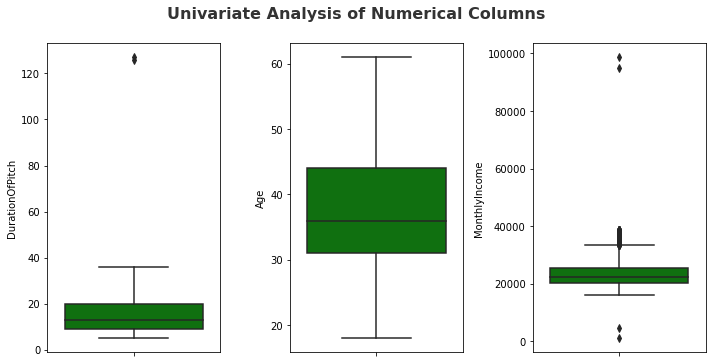

In [ ]:
# numerical columns
plt.figure(figsize=(10, 5))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Dari boxplot di atas dapat dilihat bahwa:
- Kolom `DurationOfPitch` memiliki outlier 2 data dengan boxplot karena jauh Q3
- 1MonthlyIncome1 memiliki banyak outlier

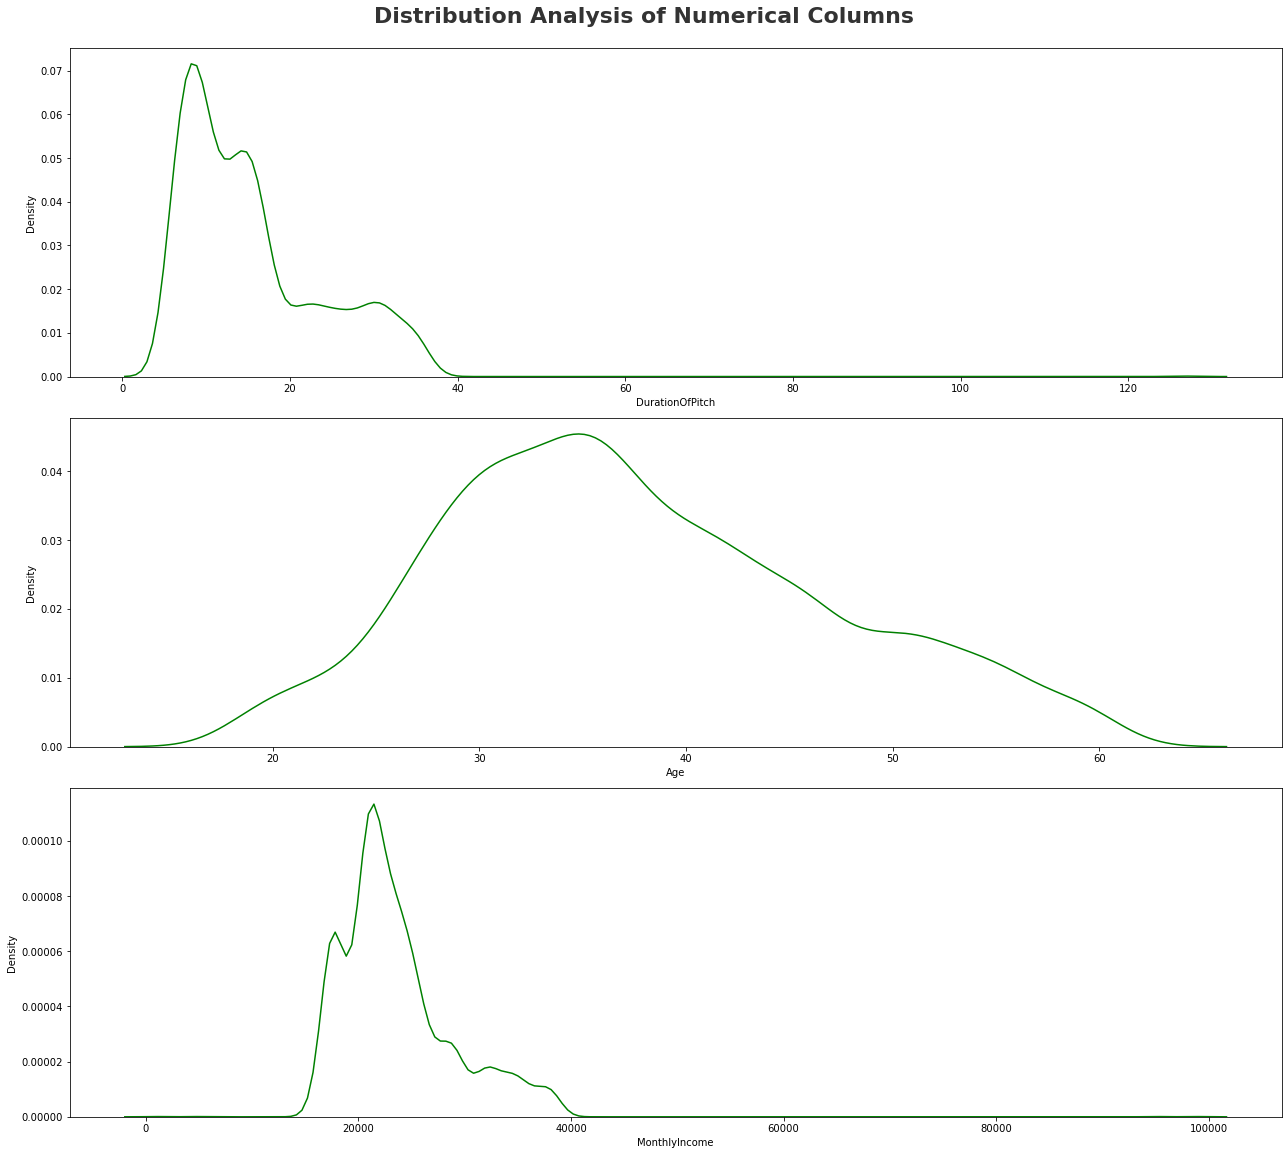

In [ ]:
# numerical columns
plt.figure(figsize=(18, 16))
plt.suptitle('Distribution Analysis of Numerical Columns', fontsize=22, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(nums)):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(x=df[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

Berdasarkan visualisasi di atas bisa dilihat bahwa:
- kolom `Age` memiliki distribusi normal
- kolom `DurationOfPitch` memiliki distribusi positive skewness
- kolom `MonthlyIncome` cenderung untuk positive skewness

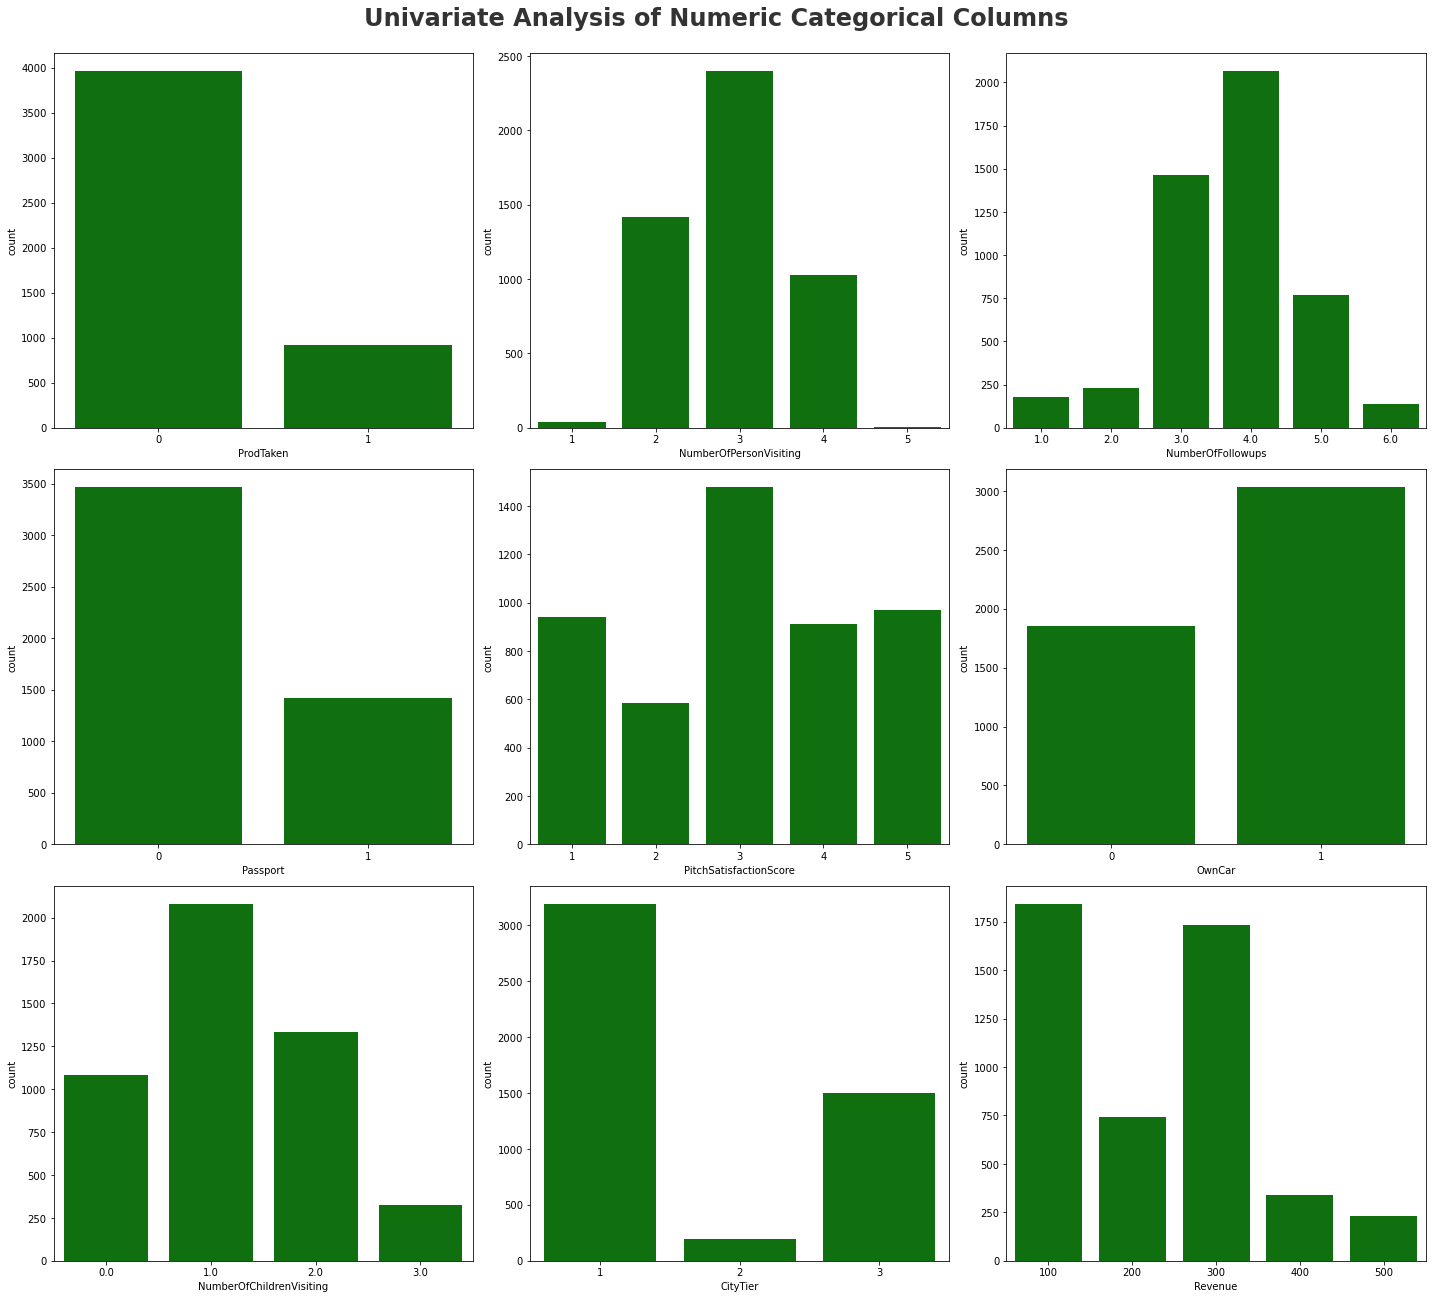

In [ ]:
# numeric categorical columns
plt.figure(figsize=(20, 18))
plt.suptitle('Univariate Analysis of Numeric Categorical Columns', fontsize=24, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cat)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[num_cat[i]], color='green')
    plt.tight_layout()

Berdasarkan visualisasi di atas bisa dilihat bahwa:
- Data imbalance karena variabel `Prodtaken` (target) 1 lebih sedikit dibanding 0
- Kolom `Passport` imbalance dengan 1 lebih sedikit dibanding 0

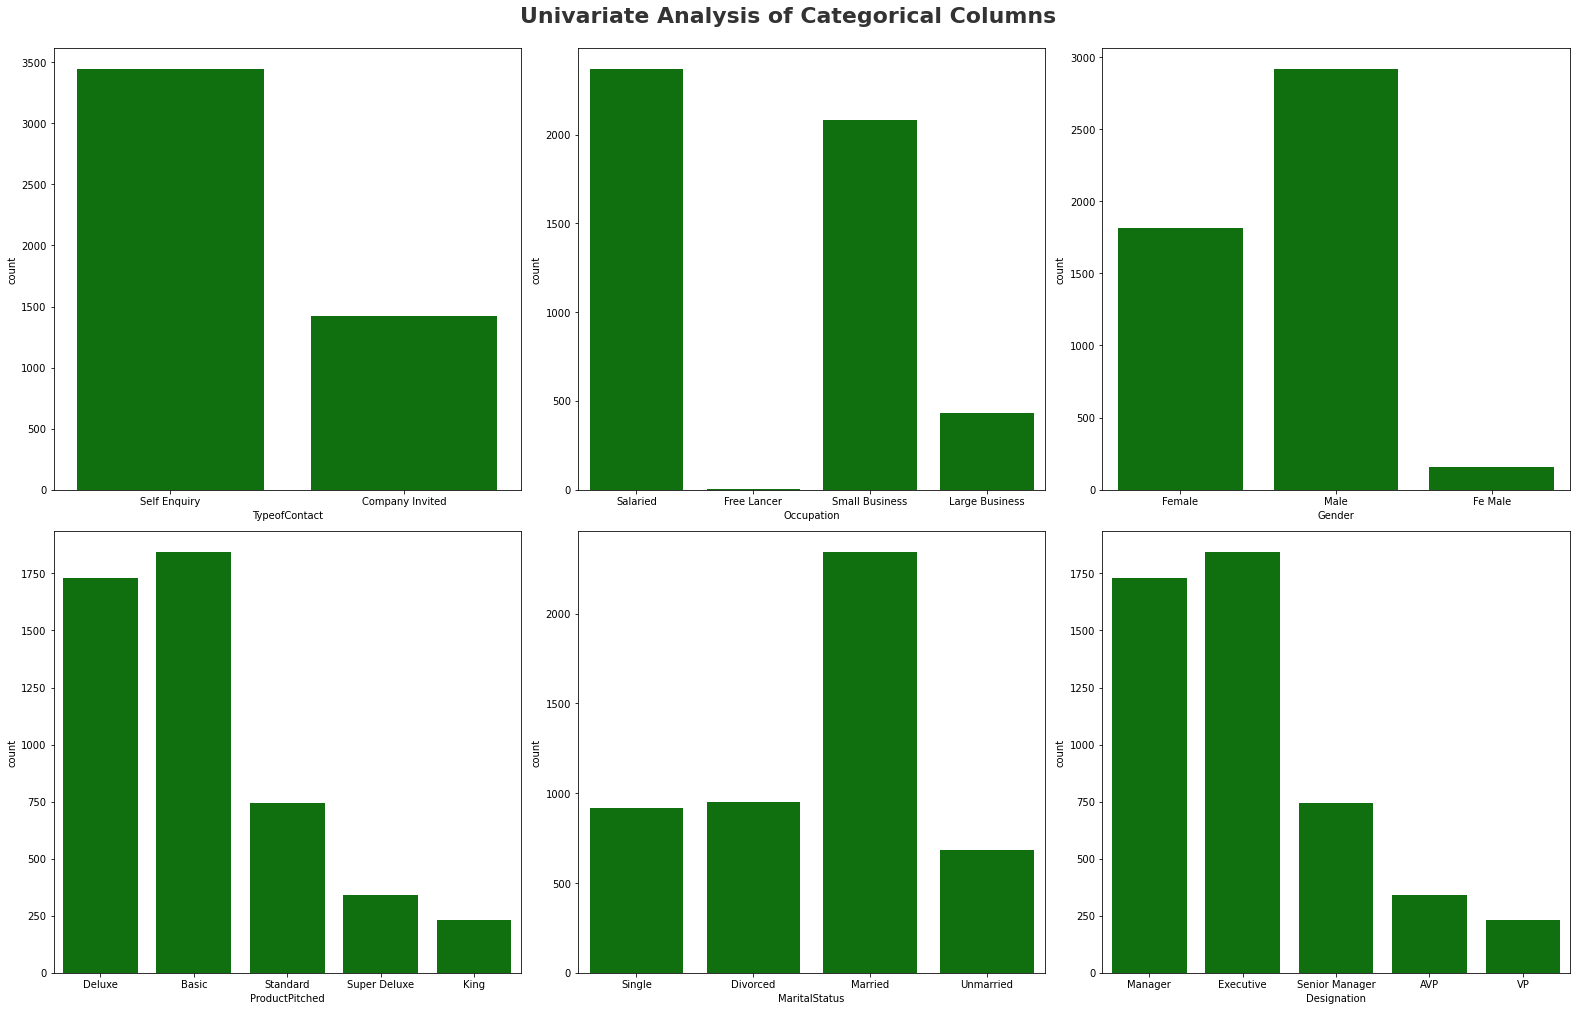

In [ ]:
# categorical columns
plt.figure(figsize=(22, 14))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=22, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cats[i]], color='green')
    plt.tight_layout()

Berdasarkan visualisasi di atas bisa dilihat bahwa:
- pada kolom Occupation didominasi Salaried dan Small Business, namun jumlah Free Lancer terlalu sedikit yaitu hanya 2 data.

## Bivariate Analysis

### Target (ProdTaken)

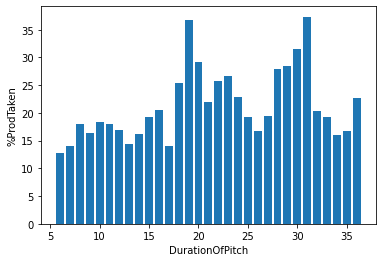

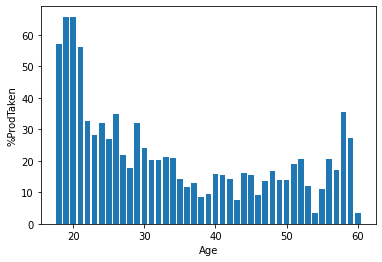

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

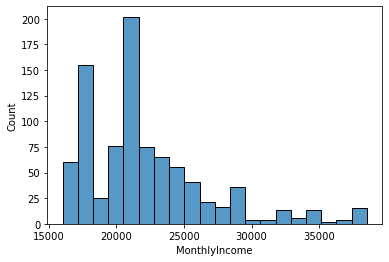

In [ ]:
nums.remove('MonthlyIncome')
for j in range (0,len(nums)):
    num = nums[j]
    df['ProdTaken_new'] = df['ProdTaken']
    df_num = df.groupby([num])['ProdTaken'].count()
    df_num = df_num.reset_index()
    df_num_corr = df[df['ProdTaken']==1].groupby([num])['ProdTaken_new'].count()
    df_num_corr = df_num_corr.reset_index()
    df_num_corr = df_num.merge(df_num_corr,how='left',on=num)
    df_num_corr['%ProdTaken'] = (df_num_corr['ProdTaken_new']/df_num_corr['ProdTaken'])*100
    plt.bar(df_num_corr[num],df_num_corr['%ProdTaken'])
    plt.xlabel(num)
    plt.ylabel('%ProdTaken')
    plt.show()
sns.histplot(df[df['ProdTaken']==1]['MonthlyIncome'])

Berdasarkan visualisai di atas dapat dilihat bahwa:
- Customer dengan umur 18-21 memiliki persentase prodTaken tertinggi

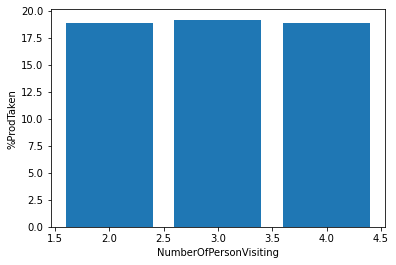

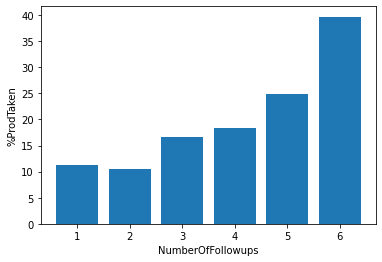

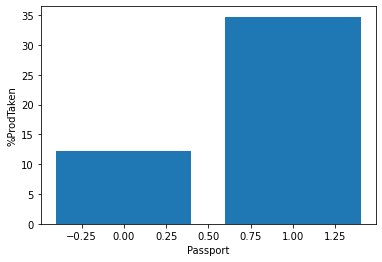

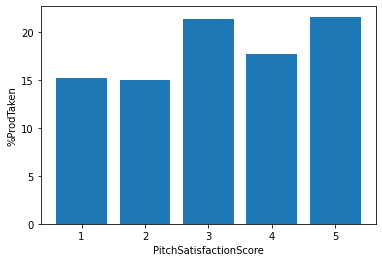

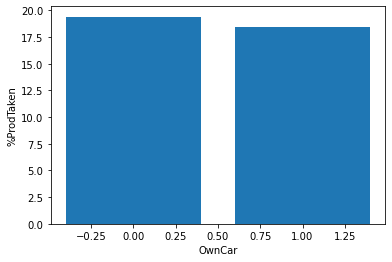

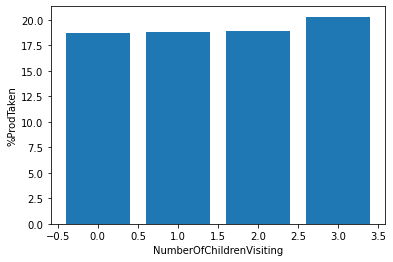

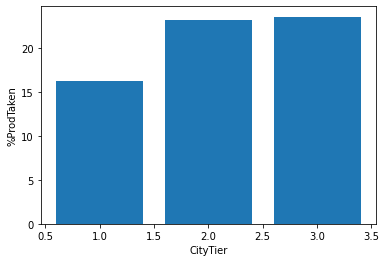

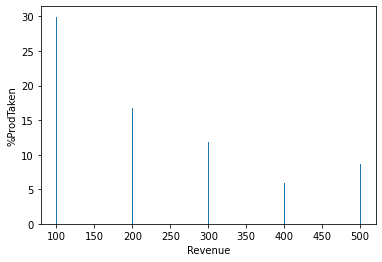

In [ ]:
num_cat.remove('ProdTaken')
for j in range (0,len(num_cat)):
    cat = num_cat[j]
    df['ProdTaken_new'] = df['ProdTaken']
    df['ProdTaken1'] = df['ProdTaken']
    df_cat = df.groupby([cat])['ProdTaken1'].count()
    df_cat = df_cat.reset_index()
    df_cat_corr = df[df['ProdTaken1']==1].groupby([cat])['ProdTaken_new'].count()
    df_cbat_corr = df_cat_corr.reset_index()
    df_cat_corr = df_cat.merge(df_cat_corr,how='left',on=cat)
    df_cat_corr['%ProdTaken'] = (df_cat_corr['ProdTaken_new']/df_cat_corr['ProdTaken1'])*100
    plt.bar(df_cat_corr[cat],df_cat_corr['%ProdTaken'])
    plt.xlabel(cat)
    plt.ylabel('%ProdTaken')
    plt.show()

**Data Insight**
    
    1. Semakin banyak followups yang dilakukan semakin meningkat persentase %ProdTaken 

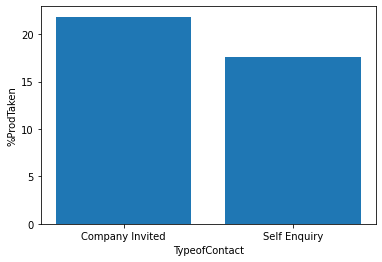

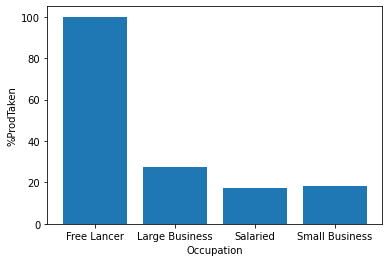

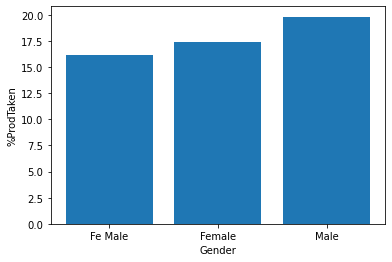

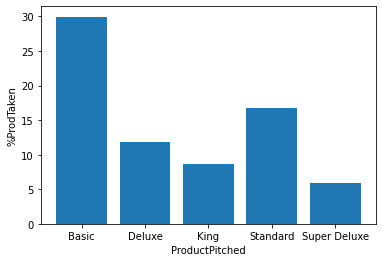

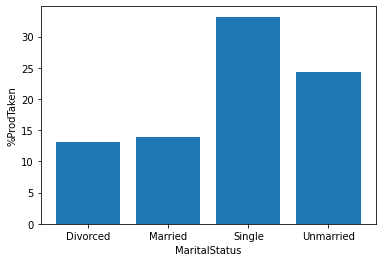

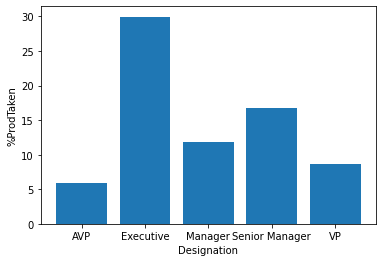

In [ ]:
for j in range (0,len(cats)):
    cat = cats[j]
    df['ProdTaken_new'] = df['ProdTaken']
    df_cat = df.groupby([cat])['ProdTaken'].count()
    df_cat = df_cat.reset_index()
    df_cat_corr = df[df['ProdTaken']==1].groupby([cat])['ProdTaken_new'].count()
    df_cat_corr = df_cat_corr.reset_index()
    df_cat_corr = df_cat.merge(df_cat_corr,how='left',on=cat)
    df_cat_corr['%ProdTaken'] = (df_cat_corr['ProdTaken_new']/df_cat_corr['ProdTaken'])*100
    plt.bar(df_cat_corr[cat],df_cat_corr['%ProdTaken'])
    plt.xlabel(cat)
    plt.ylabel('%ProdTaken')
    plt.show()

**Data Insight**

  1. Paket Basic merupakan paket wisata dengan %proTaken tertinggi
  2. Customer dengan status Single dan dan Unmarried memiliki nilai %prodtaken yang lebih tinggi dibandingkan customer dengan status lainnya
  3. Customer dengan Designation Executive memiliki nilai %prodTaken tertinggi 

## Revenue

In [ ]:
df1 = df[df['ProdTaken']==1]
df1.head(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Revenue,ProdTaken_new,ProdTaken1
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,1.0,1,2,1,0.0,Manager,20993.0,300,1,1
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,7.0,1,3,0,0.0,Executive,17090.0,100,1,1
14,200014,1,28.0,Self Enquiry,1,30.0,Salaried,Male,2,4.0,...,6.0,1,2,0,0.0,Executive,17028.0,100,1,1


In [ ]:
df1['Revenue'].sum()

159200

**Data Insight**

  1. Total revenue yang didapatkan oleh perusahaan adalah 159200

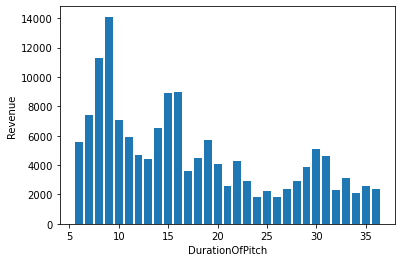

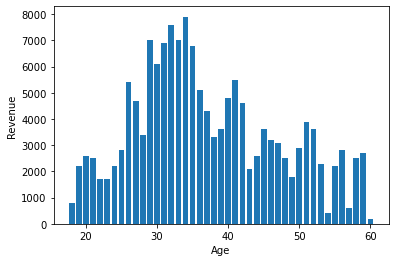

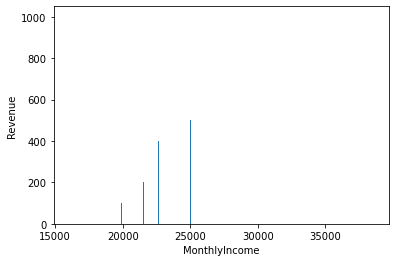

In [ ]:
numeric = ['DurationOfPitch','Age','MonthlyIncome']
for j in range (0,len(numeric)):
    num = numeric[j]
    df_num = df1.groupby([num])['Revenue'].sum()
    df_num = df_num.reset_index()
    plt.bar(df_num[num],df_num['Revenue'])
    plt.xlabel(num)
    plt.ylabel('Revenue')
    plt.show()

**Data Insight**
  1. Consumer dengan umur 25-35 merupakan consumer yang paling banyak memberikan revenue ke Perusahaan

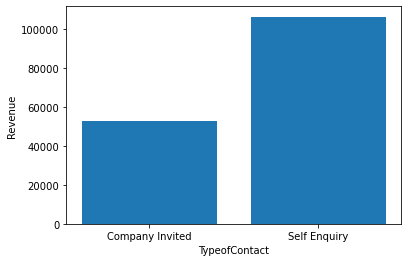

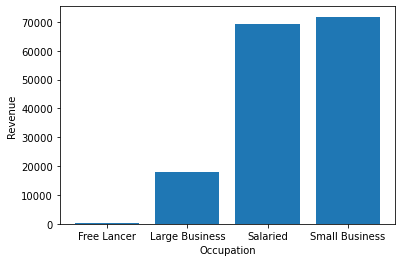

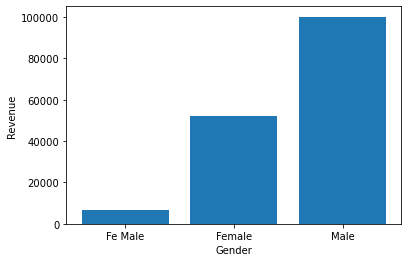

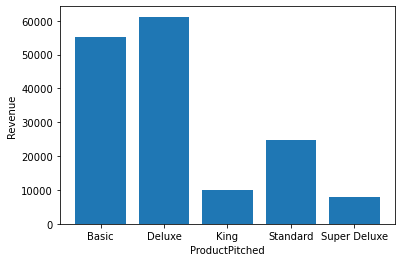

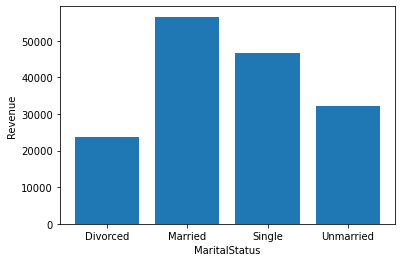

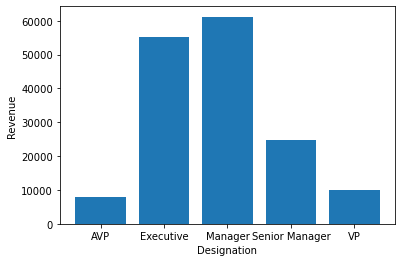

In [ ]:
for j in range (0,len(cats)):
    num = cats[j]
    df_num = df1.groupby([num])['Revenue'].sum()
    df_num = df_num.reset_index()
    plt.bar(df_num[num],df_num['Revenue'])
    plt.xlabel(num)
    plt.ylabel('Revenue')
    plt.show()

**Data Insight**

1. Occupation dengan Salaried dan Small Business memberikan revenue yang lebih banyak pada perusahaan
2. Deluxe dan Basic memberikan revenue yang lebih banyak
3. Married dan Single memberikan revenue yang lebih banyak
4. Manager dan Executive merupakan Designation yang paling banyak memberikan revenue

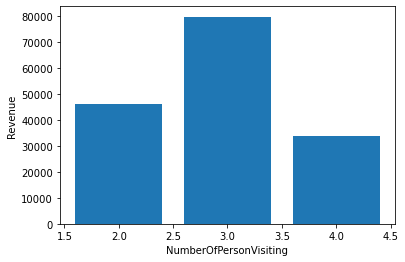

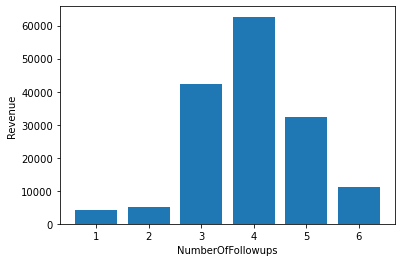

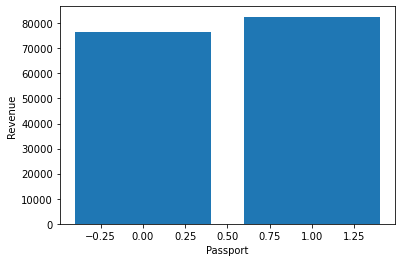

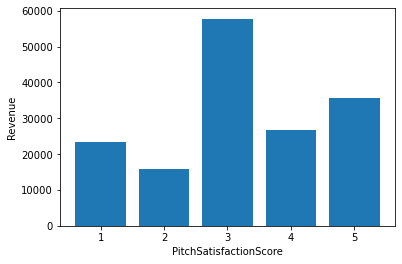

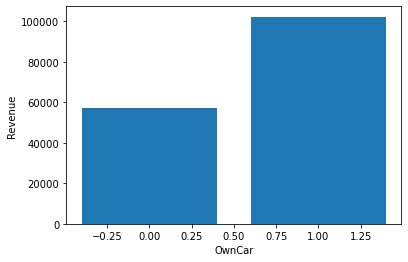

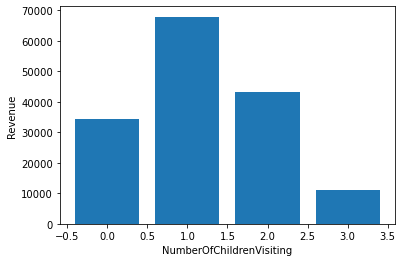

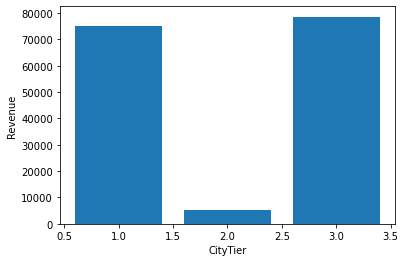

ValueError: cannot insert Revenue, already exists

In [ ]:
for j in range (0,len(num_cat)):
    num = num_cat[j]
    df_num = df1.groupby([num])['Revenue'].sum()
    df_num = df_num.reset_index()
    plt.bar(df_num[num],df_num['Revenue'])
    plt.xlabel(num)
    plt.ylabel('Revenue')
    plt.show()

**Data Insight**

1. Customer pada city tier 1 dan 3 memiliki mendominasi pemberian revenue ke perusahaan

## Multivariate Analysis

In [ ]:
df.corr()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Revenue,ProdTaken_new,ProdTaken1
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833,-0.012336,0.056506,0.056506
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585,-0.217461,1.000000,1.000000
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869,0.425807,-0.147254,-0.147254
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817,0.180000,0.086852,0.086852
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252,-0.013265,0.078257,0.078257
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134,-0.036206,0.009627,0.009627
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503,-0.001585,0.112171,0.112171
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289,-0.024358,0.099577,0.099577
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105,0.060371,0.018898,0.018898
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545,-0.026083,0.260844,0.260844


<AxesSubplot:>

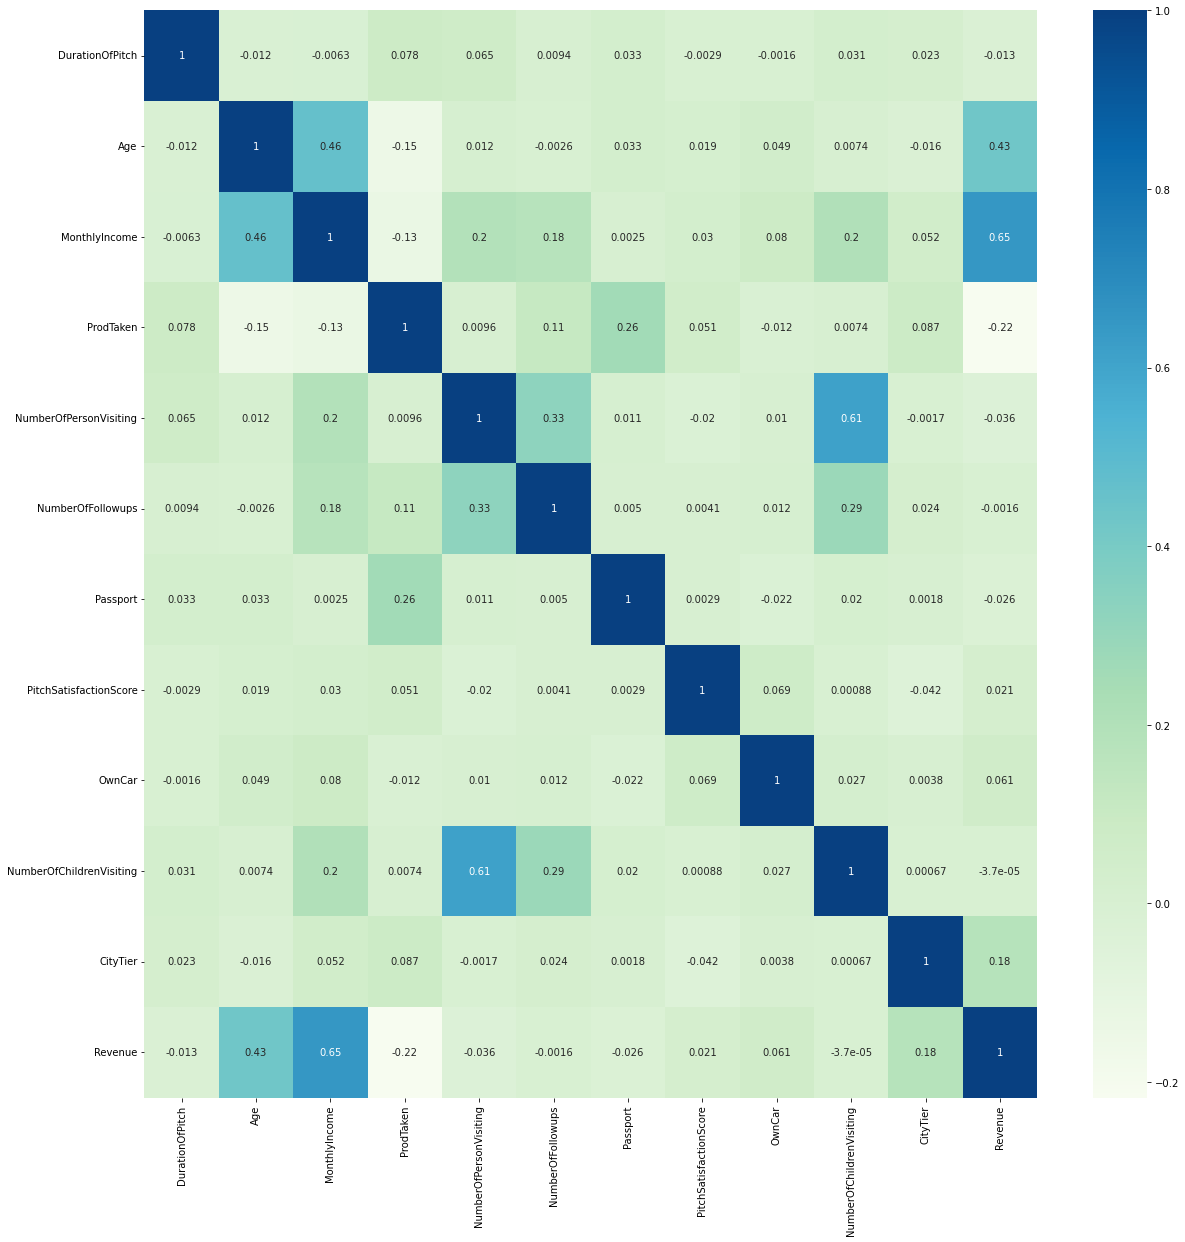

In [ ]:
# correlation analysis
plt.figure(figsize = (20,20))
corr = ['DurationOfPitch','Age','MonthlyIncome','ProdTaken','Gender','NumberOfPersonVisiting','NumberOfFollowups','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','CityTier','Revenue']
df_corr = df[corr]
correlation = df_corr.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

**Data Insight**

  1. Tidak ada kolom yang memiliki multicollinearitas tinggi dengan target
  2. Revenue memiliki korelasi tinggi degnan monthlyincome
  3. numberofpersonvisiting memiliki korelasi yang cukup tinggi dengan numberofchildrenvisiting

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Travel.csv')

In [3]:
def preprocessing(df):
    """"
    Objective :
    Function for preprocessing data, known missing, duplicated values and basic stastics every column in dataframe and duplicated row
    df is dataframe
    """
    try:
        import pandas as pd
        variables = pd.DataFrame(columns=['Variable','Number of unique values','Percent of Null(%)','Number of Duplicated','Type','Values'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum()/df.shape[0]*100,df[var].duplicated(keep=False).sum(),df[var].dtypes,df[var].unique()]
        return (variables.set_index('Variable'))
    except:
        print('ada kesalahan penginputan')

## Handling Duplicate 


In [4]:
df.duplicated(subset='CustomerID').sum()

0

In [5]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## Handling Missing Value

In [6]:
df.drop('CustomerID',axis=1,inplace=True)

In [7]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
ProdTaken,2,0.000000,4888,int64,"[1, 0]"
Age,44,4.623568,4888,float64,"[41.0, 49.0, 37.0, 33.0, nan, 32.0, 59.0, 30.0..."
TypeofContact,2,0.511457,4888,object,"[Self Enquiry, Company Invited, nan]"
CityTier,3,0.000000,4888,int64,"[3, 1, 2]"
DurationOfPitch,34,5.135025,4886,float64,"[6.0, 14.0, 8.0, 9.0, 30.0, 29.0, 33.0, 22.0, ..."
Occupation,4,0.000000,4888,object,"[Salaried, Free Lancer, Small Business, Large ..."
Gender,2,0.000000,4888,object,"[Female, Male]"
NumberOfPersonVisiting,5,0.000000,4888,int64,"[3, 2, 1, 4, 5]"
NumberOfFollowups,6,0.920622,4888,float64,"[3.0, 4.0, 2.0, 5.0, nan, 1.0, 6.0]"


In [8]:
df_drop = df.dropna()
print('jumlah baris yang memiliki null value',df.shape[0]-df_drop.shape[0])
print('baris yang memiliki null value',(1-df_drop.shape[0]/df.shape[0])*100,'%')

jumlah baris yang memiliki null value 760
baris yang memiliki null value 15.548281505728312 %


**Data Insight**

Kolom yang memiliki null value:
  1. Age
  2. TypeofContact
  3. DurationOfPitch
  4. NumberOfFollowups
  5. PreferredPropertyStar
  6. NumberOfTrips
  7. NumberOfChildrenVisiting
  8. MonthlyIncome

Distribusi numerik :
  1. Age (Memiliki distribusi normal)
  2. DurationOfPitch (Memiliki distribusi positive skewness)
  3. MonthlyOfIncome (distribusi positive skewness)
  
  Tindakan :
*   Imputasi numerikal dengan median
*   Imputasi dengan designation (liat distribusi antara umur dan designation)
*   Imputasi kategorikal bisa modus
*   Imputasi kategorikal bisa korelasi dengan variabel lain
*   NumberOfTrips nilai null disebabkan karena customer tidak pernah ikut trip
*   NumberOfFollowups nilai null disebabkan karena customer belum dilakukan followup kembali setelah pitching
*   NumberOfChildrenVisitting nilai null disebabkan customer tidak punya anak yang ikut







In [9]:
categorical = ['TypeofContact','Occupation','ProductPitched','MaritalStatus','Designation']
num_cat = ['ProdTaken','Gender','NumberOfPersonVisiting','NumberOfFollowups','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','CityTier']
numeric = ['DurationOfPitch','Age']

In [10]:
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)

In [11]:
df['TypeofContact'].fillna(df['TypeofContact'].mode(),inplace=True)

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(0)

In [14]:
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode(),inplace=True)

In [15]:
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(0)

In [16]:
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(0)

In [17]:
df['Designation'].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [18]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [19]:
df['TypeofContact'] = df['TypeofContact'].replace(np.nan,'Self Enquiry')

In [20]:
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].replace(np.nan,3)

In [21]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
ProdTaken,2,0.0,4888,int64,"[1, 0]"
Age,44,0.0,4888,float64,"[41.0, 49.0, 37.0, 33.0, 36.0, 32.0, 59.0, 30...."
TypeofContact,2,0.0,4888,object,"[Self Enquiry, Company Invited]"
CityTier,3,0.0,4888,int64,"[3, 1, 2]"
DurationOfPitch,34,0.0,4886,float64,"[6.0, 14.0, 8.0, 9.0, 30.0, 29.0, 33.0, 22.0, ..."
Occupation,4,0.0,4888,object,"[Salaried, Free Lancer, Small Business, Large ..."
Gender,2,0.0,4888,object,"[Female, Male]"
NumberOfPersonVisiting,5,0.0,4888,int64,"[3, 2, 1, 4, 5]"
NumberOfFollowups,7,0.0,4888,float64,"[3.0, 4.0, 2.0, 5.0, 0.0, 1.0, 6.0]"


## Handling Outlier

Outlier :

  1. Kolom DurationOfPitch memiliki outlier 2 data dengan boxplot karena jauh Q3
  2. MonthlyIncome memiliki banyak outlier

In [22]:
outlier = ['DurationOfPitch','MonthlyIncome']

### Z-score

In [23]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
from scipy import stats
filtered_entries = np.array([True] * len(df))

for col in outlier:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df_clean_z = df    
df_clean_z = df_clean_z[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')


Jumlah baris sebelum memfilter outlier: 4888
Jumlah baris setelah memfilter outlier: 4888


### IQR

In [24]:
#Outlier dapat dihilangkan dengan IQR
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [25]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df['MonthlyIncome']>=low_limit)&(df['MonthlyIncome']<=high_limit))
df_clean_IQR = df
df_clean_IQR = df_clean_IQR[filtered_entries]
df_clean_IQR.shape[0]

4513

In [26]:
Q1 = df_clean_IQR['DurationOfPitch'].quantile(0.25)
Q3 = df_clean_IQR['DurationOfPitch'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df_clean_IQR['DurationOfPitch']>=low_limit)&(df_clean_IQR['DurationOfPitch']<=high_limit))
df_clean_IQR = df_clean_IQR[filtered_entries]
df_clean_IQR.shape[0]

4511

In [27]:
print('jumlah data yang dipakai',round((df_clean_IQR.shape[0]/df.shape[0])*100,2),'%')

jumlah data yang dipakai 92.29 %


## Encoding

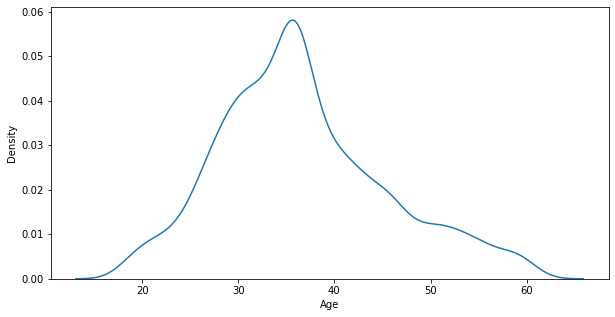

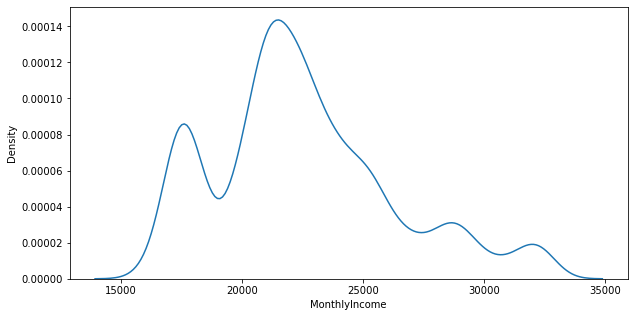

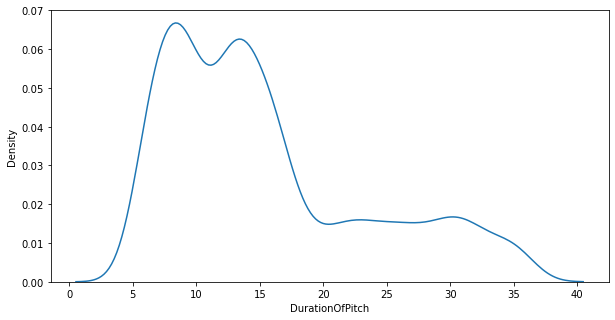

In [28]:
numeric = ['Age','MonthlyIncome','DurationOfPitch']
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df_clean_IQR,x=num)

tidak ada data yang skew

In [29]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
ProdTaken,2,0.0,4888,int64,"[1, 0]"
Age,44,0.0,4888,float64,"[41.0, 49.0, 37.0, 33.0, 36.0, 32.0, 59.0, 30...."
TypeofContact,2,0.0,4888,object,"[Self Enquiry, Company Invited]"
CityTier,3,0.0,4888,int64,"[3, 1, 2]"
DurationOfPitch,34,0.0,4886,float64,"[6.0, 14.0, 8.0, 9.0, 30.0, 29.0, 33.0, 22.0, ..."
Occupation,4,0.0,4888,object,"[Salaried, Free Lancer, Small Business, Large ..."
Gender,2,0.0,4888,object,"[Female, Male]"
NumberOfPersonVisiting,5,0.0,4888,int64,"[3, 2, 1, 4, 5]"
NumberOfFollowups,7,0.0,4888,float64,"[3.0, 4.0, 2.0, 5.0, 0.0, 1.0, 6.0]"


In [30]:
def onehot_encode(df_clean, columns):
    df_clean = df_clean.copy()
    for column in columns:
        dummies = pd.get_dummies(df_clean[column])
        df_clean = pd.concat([df_clean, dummies], axis=1)
        df_clean.drop(column, axis=1, inplace=True)
    return df_clean

In [31]:
def label_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x) if str(x) != 'nan' else x)
    return df

In [32]:
onehot = ['Occupation','MaritalStatus','Designation']

In [33]:
X = df_clean_IQR.drop('ProdTaken',axis=1)
y = df_clean_IQR['ProdTaken']

In [34]:
X = onehot_encode(X,onehot)

In [35]:
X = label_encode(X,['TypeofContact'],[['Self Enquiry', 'Company Invited']])
X = label_encode(X,['Gender'],[['Female','Male']])
X = label_encode(X,['ProductPitched'],[['Basic','Standard','Deluxe','Super Deluxe', 'King']])

In [36]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,...,Small Business,Divorced,Married,Single,Unmarried,AVP,Executive,Manager,Senior Manager,VP
0,41.0,0,3,6.0,0,3,3.0,2,3.0,1.0,...,0,0,0,1,0,0,0,1,0,0
1,49.0,1,1,14.0,1,3,4.0,2,4.0,2.0,...,0,1,0,0,0,0,0,1,0,0
2,37.0,0,1,8.0,1,3,4.0,0,3.0,7.0,...,0,0,0,1,0,0,1,0,0,0
3,33.0,1,1,9.0,0,2,3.0,0,3.0,2.0,...,0,1,0,0,0,0,1,0,0,0
4,36.0,0,1,8.0,1,2,3.0,0,4.0,1.0,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,0,3,9.0,1,3,5.0,2,4.0,2.0,...,1,0,0,0,1,0,0,1,0,0
4884,28.0,1,1,31.0,1,4,5.0,0,3.0,3.0,...,0,0,0,1,0,0,1,0,0,0
4885,52.0,0,3,17.0,0,4,4.0,1,4.0,7.0,...,0,0,1,0,0,0,0,0,1,0
4886,19.0,0,3,16.0,1,3,4.0,0,3.0,3.0,...,1,0,0,1,0,0,1,0,0,0


## Handle Class Imbalance

In [37]:
#Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21)
#SMOTE
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [38]:
y_train.value_counts()

0    2910
1    2910
Name: ProdTaken, dtype: int64

In [39]:
X_train.isnull().sum().sum()

0

In [40]:
X_test.isnull().sum().sum()

0

### Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaling using normalization
scaler = MinMaxScaler()
scaler.fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = scaler.transform(X_test['Age'].values.reshape(-1, 1))

# scaling using standardization
scaler = StandardScaler()
scaler.fit(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_train['DurationOfPitch'] = scaler.transform(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_test['DurationOfPitch'] = scaler.transform(X_test['DurationOfPitch'].values.reshape(-1, 1))

scaler.fit(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_train['MonthlyIncome'] = scaler.transform(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_test['MonthlyIncome'] = scaler.transform(X_test['MonthlyIncome'].values.reshape(-1, 1))

# Modelling

In [42]:
features_train = X_train
features_test = X_test
label_train = y_train
label_test = y_test

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(pred_train,label_train)
accuracy_test_lr = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr = precision_score(pred_train,label_train)
precision_test_lr = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr = recall_score(pred_train,label_train)
recall_test_lr = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr = f1_score(pred_train,label_train)
f1_test_lr = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr = metrics.auc(fpr,tpr)
auc_overfitting_lr = auc_test_lr-auc_train_lr

print('accuracy model :',accuracy_test_lr*100,'%')
print('AUC :',auc_test_lr*100,'%')
print('AUC overfitting:',auc_overfitting_lr*100,'%')

accuracy model : 85.27131782945736 %
AUC : 82.19035521341883 %
AUC overfitting: -11.237096044832729 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


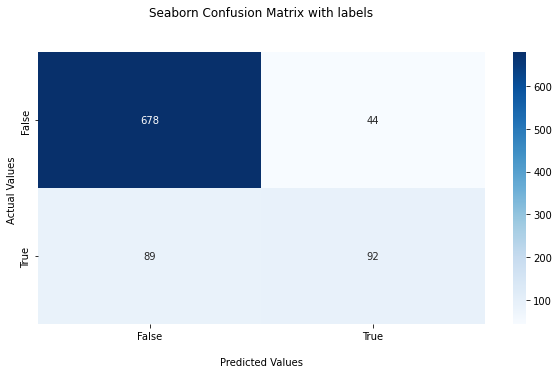

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Decision Trees

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_dct = accuracy_score(pred_train,label_train)
accuracy_test_dct = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_dct = precision_score(pred_train,label_train)
precision_test_dct = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_dct = recall_score(pred_train,label_train)
recall_test_dct = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_dct = f1_score(pred_train,label_train)
f1_test_dct = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_dct = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_dct = metrics.auc(fpr,tpr)
auc_overfitting_dct = auc_test_dct-auc_train_dct
print('accuracy model :',accuracy_test_dct*100,'%')
print('AUC :',auc_test_dct*100,'%')
print('AUC overfitting :',auc_overfitting_dct )

accuracy model : 84.27464008859357 %
AUC : 74.64187875912522 %
AUC overfitting : -0.25358121240874787


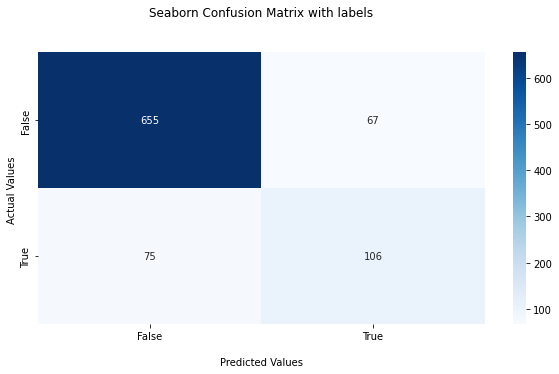

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Naive Baiyes

In [ ]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nb = accuracy_score(pred_train,label_train)
accuracy_test_nb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nb = precision_score(pred_train,label_train)
precision_test_nb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nb = recall_score(pred_train,label_train)
recall_test_nb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nb = f1_score(pred_train,label_train)
f1_test_nb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nb = metrics.auc(fpr,tpr)
auc_overfitting_nb = auc_test_nb-auc_train_nb
print('accuracy model :',accuracy_test_nb*100,'%')
print('AUC :',auc_test_nb*100,'%')
print('AUC overfitting :',auc_overfitting_nb*100,'%' )

accuracy model : 67.44186046511628 %
AUC : 67.57625380695123 %
AUC overfitting : -15.568052471907079 %


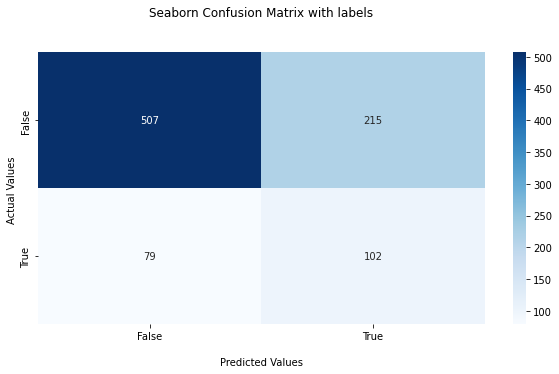

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
clf = LinearSVC()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train_svc = accuracy_score(pred_train,label_train)
accuracy_test_svc = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_svc = precision_score(pred_train,label_train)
precision_test_svc = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_svc = recall_score(pred_train,label_train)
recall_test_svc = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_svc = f1_score(pred_train,label_train)
f1_test_svc = f1_score(pred_test,label_test)

from sklearn import metrics
clf_new = CalibratedClassifierCV(clf)
clf_new.fit(features_train,label_train)
pred_proba = clf_new.predict_proba(features_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf_new.predict_proba(features_train)[:,1])
auc_train_svc = metrics.auc(fpr,tpr)
fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf_new.predict_proba(features_test)[:,1])
auc_test_svc = metrics.auc(fpr,tpr)
auc_overfitting_svc = auc_test_svc-auc_train_svc
print('accuracy model :',accuracy_test_svc*100,'%')
print('AUC :',auc_test_svc*100,'%')
print('AUC overfitting :',auc_overfitting_svc*100,'%' )

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


accuracy model : 84.27464008859357 %
AUC : 81.52691265820847 %
AUC overfitting : -11.848023868285074 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


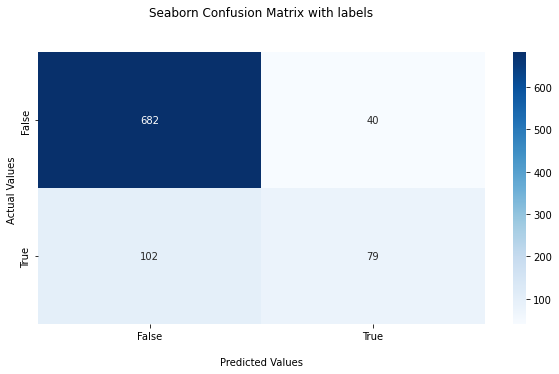

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(pred_train,label_train)
accuracy_test_rf = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf = precision_score(pred_train,label_train)
precision_test_rf = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf = recall_score(pred_train,label_train)
recall_test_rf = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf = f1_score(pred_train,label_train)
f1_test_rf = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_rf = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_rf = metrics.auc(fpr,tpr)
auc_overfitting_rf = auc_test_rf-auc_train_rf


print('accuracy model :',accuracy_test_rf*100,'%')
print('AUC :',auc_test_rf*100,'%')
print('AUC overfitting :',auc_overfitting_rf*100,'%' )

accuracy model : 89.25802879291251 %
AUC : 94.24557322355031 %
AUC overfitting : -5.754426776449694 %


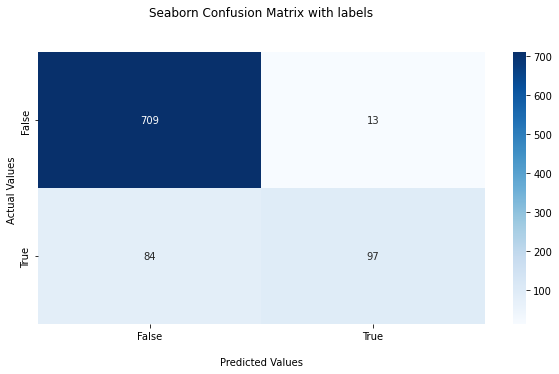

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_gb = accuracy_score(pred_train,label_train)
accuracy_test_gb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_gb = precision_score(pred_train,label_train)
precision_test_gb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_gb = recall_score(pred_train,label_train)
recall_test_gb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_gb = f1_score(pred_train,label_train)
f1_test_gb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_gb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_gb = metrics.auc(fpr,tpr)
auc_overfitting_gb = auc_test_gb-auc_train_gb

print('accuracy model :',accuracy_test_gb*100,'%')
print('accuracy overfitting :',(accuracy_train_gb-accuracy_test_gb)*100,'%')
print('AUC :',auc_test_gb*100,'%')
print('AUC overfitting :',auc_overfitting_gb*100,'%' )

accuracy model : 85.38205980066445 %
accuracy overfitting : 6.129967690744476 %
AUC : 84.3429087403009 %
AUC overfitting : -12.345592812585815 %


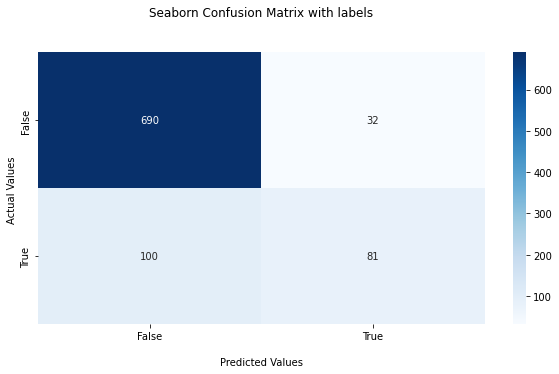

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Light GBM

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_lgb = accuracy_score(pred_train,label_train)
accuracy_test_lgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lgb = precision_score(pred_train,label_train)
precision_test_lgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lgb = recall_score(pred_train,label_train)
recall_test_lgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lgb = f1_score(pred_train,label_train)
f1_test_lgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lgb = metrics.auc(fpr,tpr)
auc_overfitting_lgb = auc_test_lgb-auc_train_lgb

print('accuracy model :',accuracy_test_lgb*100,'%')
print('AUC :',auc_test_lgb*100,'%')
print('AUC overfitting :',auc_overfitting_lgb*100,'%' )

accuracy model : 89.03654485049833 %
AUC : 93.5071394683277 %
AUC overfitting : -6.417318202224143 %


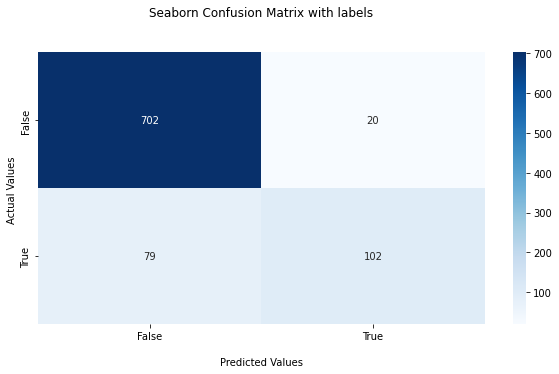

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## XGBoost

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

print('accuracy model :',accuracy_test_xgb*100,'%')
print('AUC :',auc_test_xgb*100,'%')
print('AUC overfitting :',auc_overfitting_xgb*100,'%' )

accuracy model : 85.16057585825027 %
AUC : 84.60231707503712 %
AUC overfitting : -11.926402472441067 %


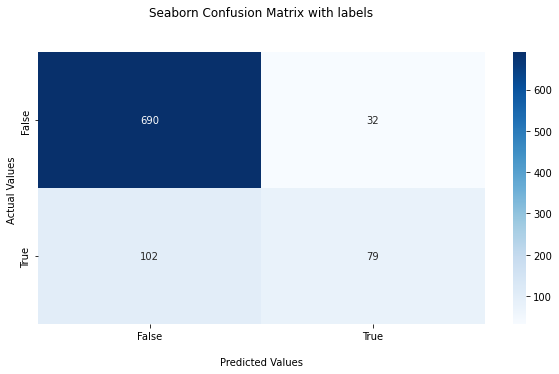

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nn = accuracy_score(pred_train,label_train)
accuracy_test_nn = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nn = precision_score(pred_train,label_train)
precision_test_nn = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nn = recall_score(pred_train,label_train)
recall_test_nn = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nn = f1_score(pred_train,label_train)
f1_test_nn = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nn = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nn = metrics.auc(fpr,tpr)
auc_overfitting_nn = auc_test_nn-auc_train_nn


print('accuracy model :',accuracy_test_nn*100,'%')
print('accuracy overfitting :',(accuracy_train_nn-accuracy_test_nn)*100,'%')
print('AUC :',auc_test_nn*100,'%')
print('AUC overfitting :',auc_overfitting_nn*100,'%' )

accuracy model : 86.37873754152824 %
accuracy overfitting : 8.037070018609215 %
AUC : 91.1625166434551 %
AUC overfitting : -7.5172934674316405 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


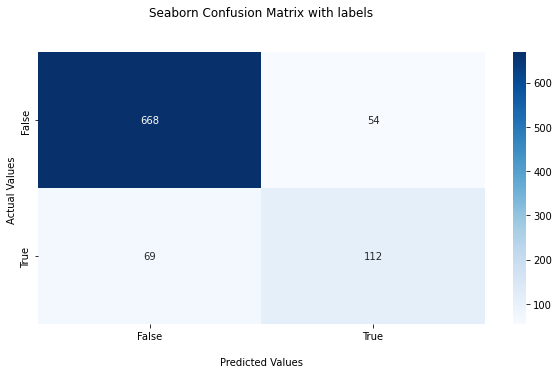

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Summary

In [149]:
kesimpulan = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost','Light GBM','Neural Network','Linear SVC','Naive Baiyes','Gradient Boosting'],
                          'AUC Test':list(np.array([auc_test_lr,auc_test_dct,auc_test_rf,auc_test_xgb,auc_test_lgb,auc_test_nn,auc_test_svc,auc_test_nb,auc_test_gb])*100),
                           'AUC Train':list(np.array([auc_train_lr,auc_train_dct,auc_train_rf,auc_train_xgb,auc_train_lgb,auc_train_nn,auc_train_svc,auc_train_nb,auc_train_gb])*100),
                           'Recall Test':list(np.array([recall_test_lr,recall_test_dct,recall_test_rf,recall_test_xgb,recall_test_lgb,recall_test_nn,recall_test_svc,recall_test_nb,recall_test_gb])*100),
                          'Recall Train':list(np.array([recall_train_lr,recall_train_dct,recall_train_rf,recall_train_xgb,recall_train_lgb,recall_train_nn,recall_train_svc,recall_train_nb,recall_train_gb])*100)})
kesimpulan.sort_values('AUC Test',ascending=False)

,Model,AUC Test,AUC Train,Recall Test,Recall Train
2,Random Forest,93.676252,100.000000,88.349515,100.000000
4,Light GBM,93.507139,99.924458,83.606557,99.646143
5,Neural Network,91.162517,98.679810,67.469880,96.144234
3,XGBoost,84.602317,96.528720,71.171171,95.585997
8,Gradient Boosting,84.342909,96.688502,71.681416,96.106870
0,Linear Regression,82.190355,93.427451,67.647059,91.805825
6,Linear SVC,81.526913,93.374937,66.386555,92.780643
1,Decision Tree,74.641879,100.000000,61.271676,100.000000
7,Naive Baiyes,67.576254,83.144306,32.176656,73.438506


# Hyperparameter Tuning

## Base Model

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=23)

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(pred_train,label_train)
accuracy_test_rf = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf = precision_score(pred_train,label_train)
precision_test_rf = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf = recall_score(pred_train,label_train)
recall_test_rf = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf = f1_score(pred_train,label_train)
f1_test_rf = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_rf = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_rf = metrics.auc(fpr,tpr)
auc_overfitting_rf = auc_test_rf-auc_train_rf


print('accuracy model :',accuracy_test_rf*100,'%')
print('AUC :',auc_test_rf*100,'%')
print('AUC overfitting :',auc_overfitting_rf*100,'%')

accuracy model : 89.03654485049833 %
AUC : 93.91193890512848 %
AUC overfitting : -6.088061094871522 %


In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}

## Learning Curves

### n_estimators

In [ ]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = RandomForestClassifier(n_estimators=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [ ]:
param_values = [int(x)for x in np.linspace(2,1000,10)]

param value: 2; train: 0.9869214463693154; test: 0.750799651061355
param value: 112; train: 1.0; test: 0.9375736520714405
param value: 223; train: 1.0; test: 0.9416369507659816
param value: 334; train: 1.0; test: 0.9479308550527235
param value: 445; train: 1.0; test: 0.9452105110114629
param value: 556; train: 1.0; test: 0.9461899879095821
param value: 667; train: 0.9999999999999999; test: 0.9456619886441897
param value: 778; train: 1.0; test: 0.9443611208888752
param value: 889; train: 1.0; test: 0.9451799023583968
param value: 1000; train: 0.9999999999999999; test: 0.9445753814603389


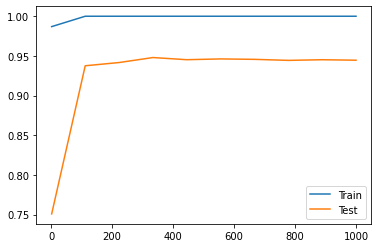

In [ ]:
draw_learning_curve(param_values)

In [ ]:
param_values = [int(x)for x in np.linspace(50,200,5)]

param value: 50; train: 1.0; test: 0.9298334889273198
param value: 87; train: 1.0; test: 0.9347653081526148
param value: 125; train: 1.0; test: 0.9399419966024396
param value: 162; train: 1.0; test: 0.9365941751733216
param value: 200; train: 1.0; test: 0.9446825117460705


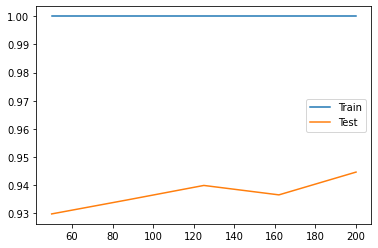

In [ ]:
draw_learning_curve(param_values)

n_estimator = 87

### max_depth

In [ ]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = RandomForestClassifier(n_estimators=87,max_depth=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [ ]:
param_values = [int(x)for x in np.linspace(2,200,10)]

param value: 2; train: 0.8464498529776455; test: 0.7299934191395908
param value: 24; train: 1.0; test: 0.9424098192559037
param value: 46; train: 1.0; test: 0.9488146799100107
param value: 68; train: 1.0; test: 0.9462091183177485
param value: 90; train: 0.9999999999999999; test: 0.9397047795411764
param value: 112; train: 1.0; test: 0.9512404156655087
param value: 134; train: 1.0; test: 0.9397736490105754
param value: 156; train: 1.0; test: 0.9427273840314657
param value: 178; train: 1.0; test: 0.9353430464792397
param value: 200; train: 1.0; test: 0.9438790346030823


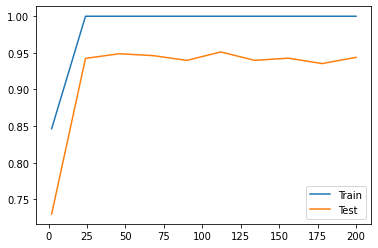

In [ ]:
draw_learning_curve(param_values)

In [ ]:
param_values = [int(x)for x in np.linspace(2,200,5)]

param value: 2; train: 0.855474132331928; test: 0.7294807242007315
param value: 51; train: 1.0; test: 0.9386908679083577
param value: 101; train: 1.0; test: 0.9388974763165547
param value: 150; train: 1.0; test: 0.9374167827244764
param value: 200; train: 1.0; test: 0.9430870357049937


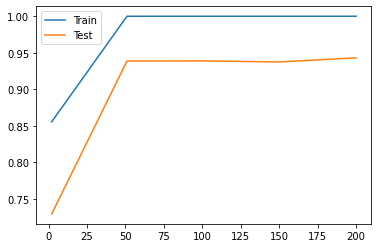

In [ ]:
draw_learning_curve(param_values)

Tidak perlu dioptimize karena lebih rendah daripada None

### min_sample split

In [ ]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = RandomForestClassifier(n_estimators=85,min_samples_split=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [ ]:
param_values = [int(x)for x in np.linspace(2,1000,10)]

param value: 2; train: 1.0; test: 0.9409482560719916
param value: 112; train: 0.9532408686718391; test: 0.8228600725425078
param value: 223; train: 0.9326647063686069; test: 0.798258367640532
param value: 334; train: 0.919160260270899; test: 0.7757227468205261
param value: 445; train: 0.9022950248579964; test: 0.7615050274712661
param value: 556; train: 0.8961770645127006; test: 0.7570514684501308
param value: 667; train: 0.8880759556453041; test: 0.7522382577554675
param value: 778; train: 0.8853423436189937; test: 0.7434994873050611
param value: 889; train: 0.8818263837224406; test: 0.7439127041214552
param value: 1000; train: 0.8733583684651811; test: 0.7433387918764633


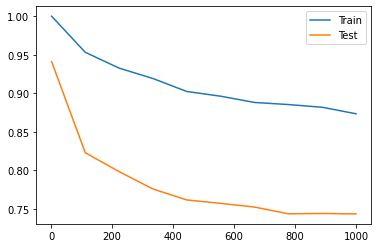

In [ ]:
draw_learning_curve(param_values)

In [ ]:
param_values = [int(x)for x in np.linspace(2,200,10)]

param value: 2; train: 1.0; test: 0.9436915566030518
param value: 24; train: 0.9918926323496418; test: 0.8757747815307387
param value: 46; train: 0.9783333923784554; test: 0.8547925498538438
param value: 68; train: 0.9682941864172601; test: 0.8481275156486741
param value: 90; train: 0.9589642304649214; test: 0.8236941583385622
param value: 112; train: 0.9510513574473611; test: 0.8132030425001149
param value: 134; train: 0.9446810972945525; test: 0.800531060130699
param value: 156; train: 0.940847297504753; test: 0.8034618386617898
param value: 178; train: 0.9371690225670457; test: 0.7928559403743438
param value: 200; train: 0.9329670173946931; test: 0.7992608010284508


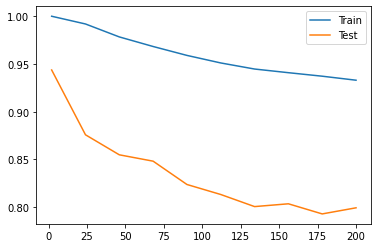

In [ ]:
draw_learning_curve(param_values)

tidak usah dioptimize

### min_samples_leaf

In [ ]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = RandomForestClassifier(n_estimators=85,min_samples_leaf=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [ ]:
param_values = [int(x)for x in np.linspace(2,2000,10)]

param value: 2; train: 0.9999196986336958; test: 0.9153364656188304
param value: 224; train: 0.8874210861940695; test: 0.7564010345724738
param value: 446; train: 0.8595046114240502; test: 0.741004882080164
param value: 668; train: 0.8355543156079877; test: 0.7323579375889564
param value: 890; train: 0.8261523246064643; test: 0.7188901302398188
param value: 1112; train: 0.8177545139995985; test: 0.7218859521586753
param value: 1334; train: 0.7469182579327122; test: 0.6991207664406729
param value: 1556; train: 0.7284240856862815; test: 0.687026522397882
param value: 1778; train: 0.7097784627011963; test: 0.6907225172556284
param value: 2000; train: 0.5; test: 0.5


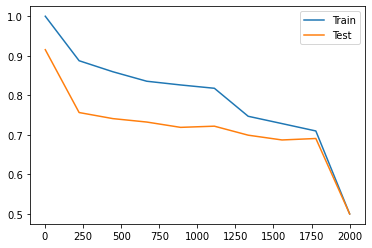

In [ ]:
draw_learning_curve(param_values)

In [ ]:
param_values = [int(x)for x in np.linspace(2,50,10)]

param value: 2; train: 0.9998991509311416; test: 0.9160940297822194
param value: 7; train: 0.9915629243868165; test: 0.878093387000505
param value: 12; train: 0.9795096893045666; test: 0.8469414303423579
param value: 18; train: 0.9689067205158182; test: 0.8345143171974718
param value: 23; train: 0.960419574638939; test: 0.8267397193186514
param value: 28; train: 0.9549925012694701; test: 0.820755727644205
param value: 34; train: 0.9478527650830764; test: 0.8068134861725409
param value: 39; train: 0.9445286427888193; test: 0.8096447865811666
param value: 44; train: 0.9389949339285081; test: 0.8028496656004651
param value: 50; train: 0.936644583790933; test: 0.8038138381720512


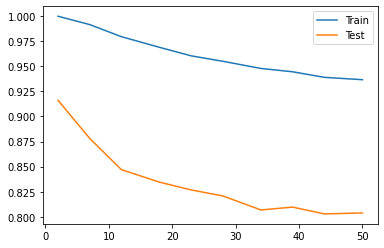

In [ ]:
draw_learning_curve(param_values)

tidak usah dioptimize

Kesimpulan :

1. n_estimators optimum adalah 65

## Randomized CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['auto', 'sqrt',None]
bootstrap = [True, False]
criterion = ['gini','entropy']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'bootstrap': bootstrap,
               'criterion':criterion}

rf = RandomForestClassifier(random_state=23)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 10, scoring='recall')
rf_random.fit(features_train, label_train)
print(rf_random.best_params_)

{'n_estimators': 73, 'max_features': 'auto', 'criterion': 'gini', 'bootstrap': False}


In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_random = RandomForestClassifier(bootstrap=False,max_features='auto',n_estimators=73,criterion='gini',random_state=23)
rf_random.fit(features_train, label_train)
pred_train = rf_random.predict(features_train)
pred_test = rf_random.predict(features_test)
pred_proba = rf_random.predict_proba(features_test)[:,1]

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train),  rf_random.predict_proba(features_train)[:,1])
auc_train_rf_random = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test),  rf_random.predict_proba(features_test)[:,1])
auc_test_rf_random = metrics.auc(fpr,tpr)
auc_overfitting_rf_random = auc_test_rf_random-auc_train_rf_random
from sklearn.metrics import accuracy_score
accuracy_train_rf_random = accuracy_score(pred_train,label_train)
accuracy_test_rf_random = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf_random = precision_score(pred_train,label_train)
precision_test_rf_random = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf_random = recall_score(pred_train,label_train)
recall_test_rf_random = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf_random = f1_score(pred_train,label_train)
f1_test_rf_random = f1_score(pred_test,label_test)

print('AUC Test:',auc_test_rf_random*100,'%')
print('AUC Train :',auc_train_rf_random*100,'%')

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


AUC Test: 95.64668431765661 %
AUC Train : 100.0 %


## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
max_features = ['auto', 'sqrt',None]
max_depth = [int(x) for x in np.linspace(2, 100, num = 10)]
bootstrap = [True, False]
grid_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

rf = RandomForestClassifier(random_state = 23)

rf_grid = GridSearchCV(estimator = rf, param_grid = grid_grid, cv = 10, scoring='recall')
rf_grid.fit(features_train, label_train)

print(rf_grid.best_params_)

{'bootstrap': False, 'max_depth': 34, 'max_features': 'auto', 'n_estimators': 23}


In [45]:
rf_grid = RandomForestClassifier(bootstrap=False, max_depth=34, max_features='auto',n_estimators=23,random_state=23)
features_train = X_train
features_test = X_test
rf_grid.fit(features_train, label_train)
pred_train = rf_grid.predict(features_train)
pred_test = rf_grid.predict(features_test)
pred_proba = rf_grid.predict_proba(features_test)[:,1]

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train),  rf_grid.predict_proba(features_train)[:,1])
auc_train_rf_grid = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test),  rf_grid.predict_proba(features_test)[:,1])
auc_test_rf_grid = metrics.auc(fpr,tpr)
auc_overfitting_rf_grid = auc_test_rf_grid-auc_train_rf_grid

from sklearn.metrics import accuracy_score
accuracy_train_rf_grid = accuracy_score(pred_train,label_train)
accuracy_test_rf_grid = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf_grid = precision_score(pred_train,label_train)
precision_test_rf_grid = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf_grid = recall_score(pred_train,label_train)
recall_test_rf_grid = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf_grid = f1_score(pred_train,label_train)
f1_test_rf_grid = f1_score(pred_test,label_test)


print('AUC Test:',auc_test_rf_grid*100,'%')
print('AUC Train :',auc_train_rf_grid*100,'%')

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


AUC Test: 94.92164184815047 %
AUC Train : 100.0 %


In [ ]:
rf_grid.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 34,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 23,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grid_param = {'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 34,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 23,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}

## Feature Importance

In [48]:
X_train_col = X_train
X_test_col = X_test
features_important = pd.DataFrame({'Feature':X_train_col.columns.tolist(),
                          'Value':list(rf_grid.feature_importances_)})
features_important = features_important.sort_values('Value',ascending=False)
features_important

,Feature,Value
20,Married,0.084730
14,MonthlyIncome,0.083720
0,Age,0.076897
3,DurationOfPitch,0.076489
8,PreferredPropertyStar,0.075270
6,NumberOfFollowups,0.058412
7,ProductPitched,0.058058
19,Divorced,0.052894
9,NumberOfTrips,0.047437
10,Passport,0.039024


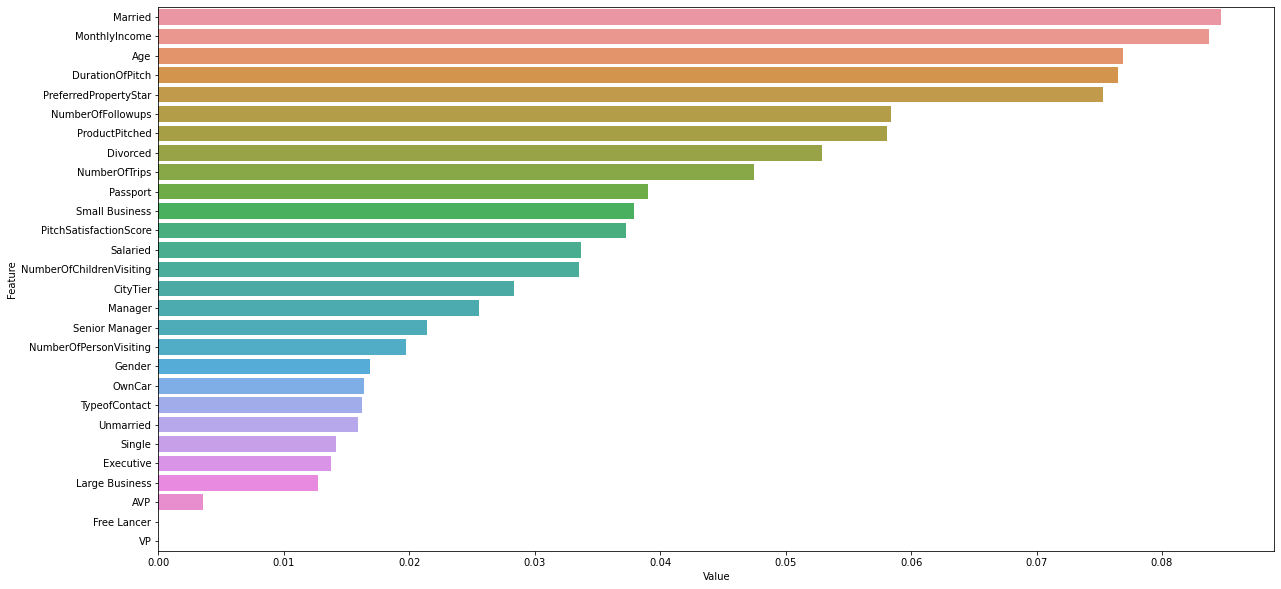

In [49]:
plt.figure(figsize=(20,10))
sns.barplot(x='Value',y='Feature',data=features_important)
plt.show()

In [50]:
column_important = features_important['Feature'].tolist()

In [51]:
X_train_feature_importances = X_train[column_important]
X_test_feature_importances = X_test[column_important]
features_train_importances = X_train_feature_importances
features_test_importances = X_test_feature_importances
label_test_importances = y_test
label_train_importances = y_train

param value: 1; train: 0.9936711895230336; test: 0.7456841799176627
param value: 2; train: 0.99667865282649; test: 0.6425215408395955
param value: 3; train: 0.9997736210011691; test: 0.7257082077103197
param value: 4; train: 0.9999356998618344; test: 0.7642062411043603
param value: 5; train: 0.9999768543120653; test: 0.7868987312713304
param value: 6; train: 0.9999943907133831; test: 0.8026583615188013
param value: 7; train: 0.9999988781426766; test: 0.8424343061783566
param value: 8; train: 0.9999999409548778; test: 0.8572450681807747
param value: 9; train: 1.0; test: 0.8606043678547926
param value: 10; train: 1.0; test: 0.8650885355289939
param value: 11; train: 1.0; test: 0.8239505058079919
param value: 12; train: 1.0; test: 0.8362284017691801
param value: 13; train: 1.0; test: 0.8581212408747954
param value: 14; train: 1.0; test: 0.8789963422659586
param value: 15; train: 1.0; test: 0.9272164490901579
param value: 16; train: 1.0; test: 0.9410018212148574
param value: 17; train: 1.0

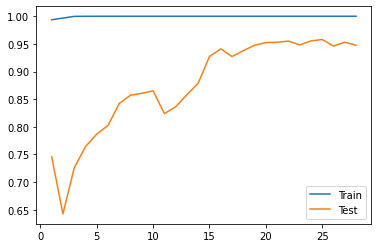

In [ ]:

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []
    param_values = [int(x)for x in np.linspace(1,28,28)]
    for c in param_values:
        column = column_important[:c]
        X_train = features_train_importances[column]
        X_test =  features_test_importances[column]
        model = RandomForestClassifier(bootstrap= False, ccp_alpha= 0.0, class_weight= None, criterion= 'gini', max_depth= 45, max_features= 'sqrt', max_leaf_nodes= None, max_samples= None, min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 2, min_weight_fraction_leaf= 0.0, n_estimators= 50, n_jobs= None, oob_score= False, verbose= 0, warm_start= False, random_state= 23)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [52]:
column = column_important[:27]
features_train = features_train_importances[column]
features_test =  features_test_importances[column]
rf_feature_important = RandomForestClassifier(bootstrap= False, ccp_alpha= 0.0, class_weight= None, criterion= 'gini', max_depth= 45, max_features= 'sqrt', max_leaf_nodes= None, max_samples= None, min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 2, min_weight_fraction_leaf= 0.0, n_estimators= 50, n_jobs= None, oob_score= False, verbose= 0, warm_start= False, random_state= 23)
rf_feature_important.fit(features_train, label_train)
pred_train = rf_feature_important.predict(features_train)
pred_test = rf_feature_important.predict(features_test)
pred_proba = rf_feature_important.predict_proba(features_test)[:,1]

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train),  rf_feature_important .predict_proba(features_train)[:,1])
auc_train_feature_important = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test),  rf_feature_important .predict_proba(features_test)[:,1])
auc_test_feature_important = metrics.auc(fpr,tpr)
auc_overfitting_rf_feature_important  = auc_test_feature_important -auc_train_feature_important

from sklearn.metrics import accuracy_score
accuracy_train_rf_feature_important = accuracy_score(pred_train,label_train)
accuracy_test_rf_feature_important = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf_feature_important = precision_score(pred_train,label_train)
precision_test_rf_feature_important = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf_feature_important = recall_score(pred_train,label_train)
recall_test_rf_feature_important = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf_feature_important = f1_score(pred_train,label_train)
f1_test_rf_feature_important = f1_score(pred_test,label_test)



print('AUC test :',auc_test_feature_important *100,'%')
print('AUC train :',auc_train_feature_important *100,'%')

AUC test : 95.42859766455977 %
AUC train : 100.0 %


In [53]:
kesimpulan = pd.DataFrame({'Model':['Base Model','RandomizedSearchCV','GridSearchCV','Feature Importance'],
                          'AUC Test':list(np.array([auc_test_rf,auc_test_rf_random,auc_test_rf_grid,auc_test_feature_important])*100),
                           'AUC Train':list(np.array([auc_train_rf,auc_train_rf_random,auc_train_rf_grid,auc_train_feature_important])*100),
                           'Recall train':list(np.array([recall_train_rf,recall_train_rf_random,recall_train_rf_grid,recall_train_rf_feature_important])*100),
                           'Recall Test':list(np.array([recall_test_rf,recall_test_rf_random,recall_test_rf_grid,recall_test_rf_feature_important])*100)
                           
                          })
kesimpulan.sort_values('AUC Test',ascending=False)

,Model,AUC Test,AUC Train,Recall train,Recall Test
1,RandomizedSearchCV,95.646684,100.0,100.0,92.436975
3,Feature Importance,95.428598,100.0,100.0,88.793103
2,GridSearchCV,94.921642,100.0,100.0,88.188976
0,Base Model,93.911939,100.0,100.0,91.000000


# Business Recomendation

In [65]:
bins = [0,np.percentile(df['MonthlyIncome'],25),np.percentile(df['MonthlyIncome'],50),np.percentile(df['MonthlyIncome'],75),np.percentile(df['MonthlyIncome'],100)]

In [67]:
kategori = ['Low','Mid','High','Very High']

In [68]:
df['MonthlyIncome_bins'] = pd.cut(df['MonthlyIncome'], bins, labels=kategori, include_lowest=True)

In [85]:
df_acc = df[df['ProdTaken']==1]
df_acc

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,MonthlyIncome_bins
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Mid
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Low
14,1,28.0,Self Enquiry,1,30.0,Salaried,Male,2,4.0,Basic,3.0,Single,6.0,1,2,0,0.0,Executive,17028.0,Low
21,1,36.0,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0,Low
24,1,34.0,Self Enquiry,1,12.0,Small Business,Male,2,3.0,Basic,5.0,Single,3.0,0,2,1,1.0,Executive,17960.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,Very High
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0,Mid
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,Very High
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0,Low


### MonthlyIncome

<AxesSubplot:xlabel='MonthlyIncome_bins', ylabel='ProdTaken'>

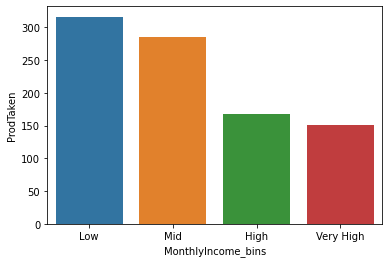

In [114]:
df_income = df_acc.groupby('MonthlyIncome_bins')['ProdTaken'].sum().reset_index()
sns.barplot(x='MonthlyIncome_bins',y='ProdTaken',data=df_income)

**Business Insight**

    1. Perusahaan dapat menawarkan lebih banyak kepada customer dengan MonthlyIncome kategori Low

<AxesSubplot:xlabel='MonthlyIncome_bins', ylabel='ProdTaken'>

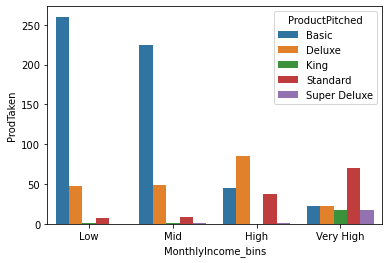

In [177]:
df_product = df_acc.groupby(['MonthlyIncome_bins','ProductPitched'])['ProdTaken'].sum().reset_index()
sns.barplot(x='MonthlyIncome_bins',y='ProdTaken',hue='ProductPitched',data=df_product)

**Business Insight**

    1. Paket basic dapat ditawarkan lebih banyak pada MonthlyIncome dengan kategori Low dan Mid
    2. Paket Deluxe dapat ditawarkan lebih banyak pada MonthlyIncome dengan kategori High
    3. Paket Standard dapat ditawarkan lebih banyak pada MonthlyIncome dengan kategori Very High

In [121]:
df_acc_low = df_acc[df_acc['MonthlyIncome_bins']=='Low']
df_acc_mid= df_acc[df_acc['MonthlyIncome_bins']=='Mid']
df_acc_high= df_acc[df_acc['MonthlyIncome_bins']=='High']
df_acc_very_high = df_acc[df_acc['MonthlyIncome_bins']=='Very High']

Text(0.5, 1.0, 'Very High')

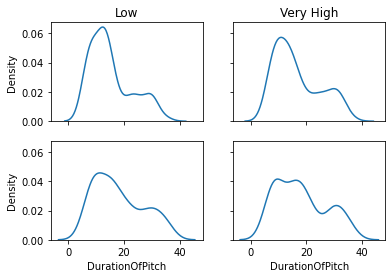

In [168]:
fig, axes = plt.subplots(2, 2,sharey=True,sharex=True)
# axes[index row, index column]
sns.kdeplot(ax=axes[0,0],x='DurationOfPitch',data=df_acc_low)
axes[0,0].set_title('Low')
sns.kdeplot(ax=axes[0,1],x='DurationOfPitch',data=df_acc_mid)
axes[0,1].set_title('Mid')
sns.kdeplot(ax=axes[1,0],x='DurationOfPitch',data=df_acc_high)
axes[0,1].set_title('High')
sns.kdeplot(ax=axes[1,1],x='DurationOfPitch',data=df_acc_very_high)
axes[0,1].set_title('Very High')

Text(0.5, 1.0, 'Very High')

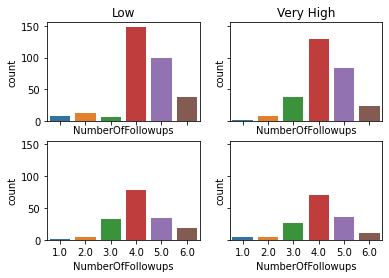

In [170]:
fig, axes = plt.subplots(2, 2,sharey=True,sharex=True)
# axes[index row, index column]
sns.countplot(ax=axes[0,0],x='NumberOfFollowups',data=df_acc_low)
axes[0,0].set_title('Low')
sns.countplot(ax=axes[0,1],x='NumberOfFollowups',data=df_acc_mid)
axes[0,1].set_title('Mid')
sns.countplot(ax=axes[1,0],x='NumberOfFollowups',data=df_acc_high)
axes[0,1].set_title('High')
sns.countplot(ax=axes[1,1],x='NumberOfFollowups',data=df_acc_very_high)
axes[0,1].set_title('Very High')

**Business Insight**

    1. DurationOfPitch yang optimum adalah 10-20 menit
    2. NumberOfFollowups yang optimum adalah 4 dan 5 kali

### Married

<AxesSubplot:xlabel='MaritalStatus', ylabel='ProdTaken'>

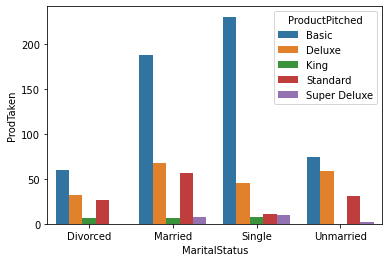

In [184]:
df_product = df_acc.groupby(['MaritalStatus','ProductPitched'])['ProdTaken'].sum().reset_index()
sns.barplot(x='MaritalStatus',y='ProdTaken',hue='ProductPitched',data=df_product)

**Data Insight**

    1. Pelanggan dengan marital status married lebih banyak menyukai paket Basic

<AxesSubplot:xlabel='MaritalStatus', ylabel='ProdTaken'>

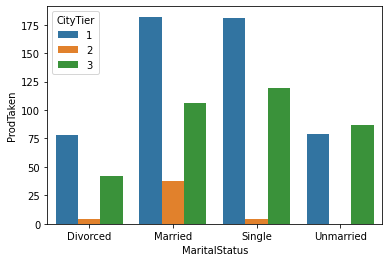

In [187]:
df_product = df_acc.groupby(['MaritalStatus','CityTier'])['ProdTaken'].sum().reset_index()
sns.barplot(x='MaritalStatus',y='ProdTaken',hue='CityTier',data=df_product)

<AxesSubplot:xlabel='MaritalStatus', ylabel='ProdTaken'>

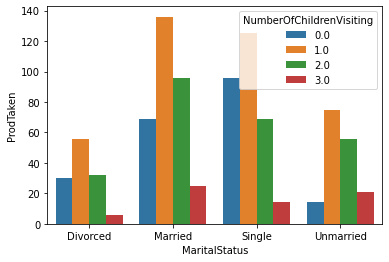

In [195]:
df_product = df_acc.groupby(['MaritalStatus','NumberOfChildrenVisiting'])['ProdTaken'].sum().reset_index()
sns.barplot(x='MaritalStatus',y='ProdTaken',hue='NumberOfChildrenVisiting',data=df_product)

**Business Insight**

    1. Dapat memberikan paket perjalanan bersama anak karena pasangan married sering membawa 1 atau 2 anak

### Age 

In [197]:
df['Age'].describe()

count    4888.000000
mean       37.547259
std         9.104795
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

In [199]:
bins = [18,25,45,61]

In [200]:
kategori = ['Youth','Adult','Elderly']

In [203]:
df_acc['CatAge'] = pd.cut(df_acc['Age'], bins, labels=kategori, include_lowest=True)

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_14788/3202483110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc['CatAge'] = pd.cut(df_acc['Age'], bins, labels=kategori, include_lowest=True)


In [204]:
df_acc['CatAge'].value_counts()

Adult      633
Elderly    144
Youth      143
Name: CatAge, dtype: int64

<AxesSubplot:xlabel='CatAge', ylabel='ProdTaken'>

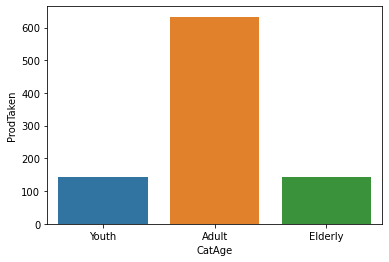

In [208]:
df_age = df_acc.groupby('CatAge')['ProdTaken'].sum().reset_index()
sns.barplot(x='CatAge',y='ProdTaken',data=df_age)

**Business Insight**

    1. Tim marketing dapat mendekati lebih banyak calon pelanggan yang berumur 26-45 tahun

<AxesSubplot:xlabel='CatAge', ylabel='ProdTaken'>

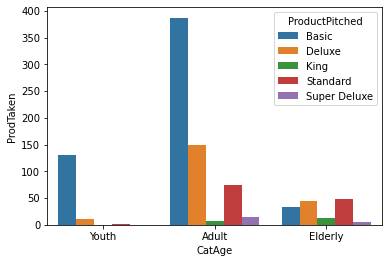

In [207]:
df_product = df_acc.groupby(['CatAge','ProductPitched'])['ProdTaken'].sum().reset_index()
sns.barplot(x='CatAge',y='ProdTaken',hue='ProductPitched',data=df_product)

**Business Insight**

    1. Tim marketing dapat menawarkan produk Basic pada pelanggan berkategori Youth dan Adult

In [1]:
import os

os.system('jupyter nbconvert --to html Modeling_Kelompok_8 (2).ipynb')

1

## Confusion Matrix

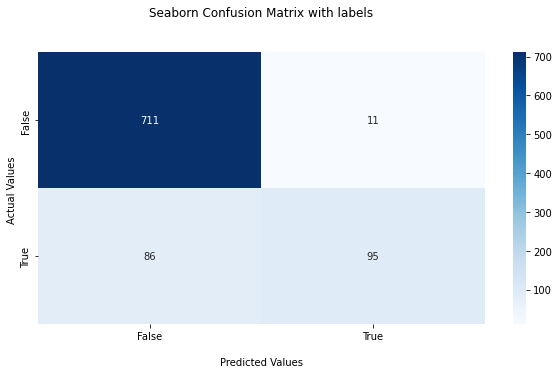

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Impact for Business Metrics

Biaya Telemarketing per jam = `$50`

Biaya Telemarketing per menit = `$0.8`

Biaya marketing = biaya per menit * DurationOfPitch


Revenue = 
  
  
  1. Basic : `$100`
  2. Standard : `$200`
  3. Deluxe : `$300`
  4. Super Deluxe : `$400`
  5. King : `$500`

Efisiensi = Total revenue/ Total Biaya Marketing

In [ ]:
X_train_business, X_test_business, y_train_business,y_test_business = train_test_split(X,y,test_size=0.2, random_state=21)

In [ ]:
X_test_business['y_test'] = label_test
X_test_business['y_pred'] = pred_test

In [ ]:
pelanggan_penerima_conventional = X_test_business
pelanggan_penerima_model = X_test_business[(X_test_business['y_pred']==1)]

In [ ]:
biaya_conv = pelanggan_penerima_conventional['DurationOfPitch'].sum()*0.8
biaya_model = pelanggan_penerima_model['DurationOfPitch'].sum()*0.8

In [ ]:
biaya_conv

11275.2

In [ ]:
biaya_model

1571.2

In [ ]:
penghematan_model = (1-biaya_model/biaya_conv)*100
penghematan_model

86.06499219526039

In [ ]:
efisiensi_conventional = (113*100+33*300+29*200+4*400+2*500 )/biaya_conv
efisiensi_conventional*100

262.52305945792534

In [ ]:
X_test_col = X_test_business

In [ ]:
X_test_col['y_test'] = label_test
X_test_col['y_pred'] = pred_test

In [ ]:
jumlah_penerima_conventional = X_test_col[X_test_col['y_test']==1]
jumlah_penerima_model = X_test_col[(X_test_col['y_test']==1)&(X_test_col['y_pred']==1)]

In [ ]:
jumlah_penerima_model ['ProductPitched'].value_counts()

0    81
2    13
1     7
3     3
Name: ProductPitched, dtype: int64

In [ ]:
efisiensi_model = (81*100+7*200+13*300+3*400 )/biaya_model
efisiensi_model*100

929.2260692464358

## Base Model

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nn = accuracy_score(pred_train,label_train)
accuracy_test_nn = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nn = precision_score(pred_train,label_train)
precision_test_nn = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nn = recall_score(pred_train,label_train)
recall_test_nn = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nn = f1_score(pred_train,label_train)
f1_test_nn = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nn = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nn = metrics.auc(fpr,tpr)
auc_overfitting_nn = auc_test_nn-auc_train_nn


print('precision test :',precision_test_nn*100,'%')
print('precision train :',(precision_train_nn)*100,'%')
print('AUC test :',auc_test_nn*100,'%')
print('AUC train :',auc_train_nn*100,'%')

precision test : 57.4585635359116 %
precision train : 92.23367697594502 %
AUC test : 90.47535238211843 %
AUC train : 99.01451329105703 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Hyperparameter Tuning

## Learning Curves


### hidden_layer_sizes

In [ ]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = MLPClassifier(hidden_layer_sizes=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [ ]:
param_values = [int(x)for x in np.linspace(2,1000,10)]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 2; train: 0.9373711930657409; test: 0.8274819791555073


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 112; train: 0.9929464696921387; test: 0.9140968151696485


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 223; train: 0.9982084528997061; test: 0.9358672196629988


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 334; train: 0.9996672216908161; test: 0.9592598827688588


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 445; train: 0.9998855705530165; test: 0.9651137876677736


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 556; train: 0.9999733116047284; test: 0.9723680384444682


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 667; train: 0.9999679975437229; test: 0.9714727353422812


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 778; train: 0.9999952763902175; test: 0.9687485652193876


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 889; train: 1.0; test: 0.9764083806492095


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 1000; train: 0.9999953944804618; test: 0.9734776021181187


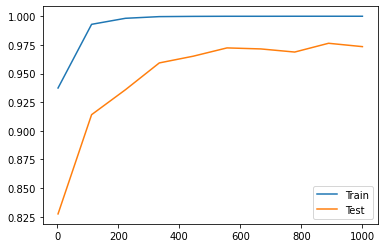

In [ ]:
draw_learning_curve(param_values)

hidden_layer_sizes = 889

### alpha

In [ ]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = MLPClassifier(hidden_layer_sizes=889,alpha=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [ ]:
param_values = [float(x)for x in np.linspace(0.0001,0.05,10)]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 0.0001; train: 1.0; test: 0.977020553710534


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 0.005644444444444445; train: 0.9999974020146195; test: 0.9775868137922591


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 0.011188888888888889; train: 0.9999924422243479; test: 0.9754824688939563


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 0.016733333333333333; train: 0.9999852387194293; test: 0.980395157711085


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 0.02227777777777778; train: 0.9999829950047827; test: 0.9785815950169112


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 0.027822222222222224; train: 0.9999472136606794; test: 0.9733781239956536


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 0.03336666666666667; train: 0.9999453242167665; test: 0.972115517056672
param value: 0.03891111111111112; train: 0.9998291234161145; test: 0.9618080531366218


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 0.04445555555555556; train: 0.9998734072578265; test: 0.9682817832601276


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 0.05; train: 0.9998651409407069; test: 0.9734776021181188


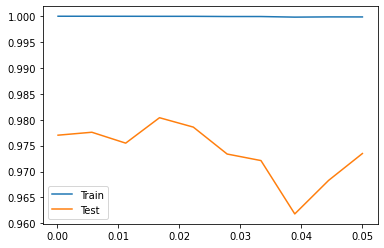

In [ ]:
draw_learning_curve(param_values)

alpha =  0.0167

### Learning_rate

In [ ]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = MLPClassifier(hidden_layer_sizes=889,alpha=0.0163,learning_rate_init=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [ ]:
param_values = [float(x)for x in np.linspace(0.0001,1,10)]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 0.0001; train: 0.9745445849718355; test: 0.8734026109181066
param value: 0.11120000000000001; train: 0.938396570659298; test: 0.8249644174408105
param value: 0.2223; train: 0.9415798112917892; test: 0.8394117016880672
param value: 0.33340000000000003; train: 0.9438290761800168; test: 0.8426179580967539
param value: 0.4445; train: 0.9308705612829324; test: 0.8008983639674936
param value: 0.5556; train: 0.9367751916014219; test: 0.8254924167062028
param value: 0.6667000000000001; train: 0.9315930373991804; test: 0.8096065257648337
param value: 0.7778; train: 0.9335014938415938; test: 0.819378338256225
param value: 0.8889; train: 0.8438854052266743; test: 0.6245006963468572
param value: 1.0; train: 0.9297515381254353; test: 0.7977380205384061


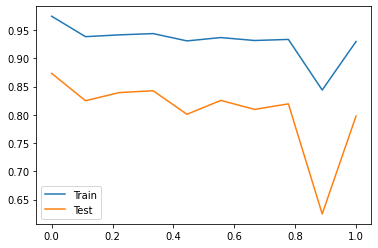

In [ ]:
draw_learning_curve(param_values)

tidak perlu dioptimasi

### max_iter

In [ ]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = MLPClassifier(hidden_layer_sizes=889,alpha=0.0163,max_iter=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [ ]:
param_values = [int(x)for x in np.linspace(1,1000,10)]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 1; train: 0.8800447562026901; test: 0.7803446534335258


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (112) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 112; train: 0.9993601870549474; test: 0.9632237033409344


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (223) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


param value: 223; train: 0.9999988190975544; test: 0.9788035077516414
param value: 334; train: 0.9999982286463316; test: 0.9790254204863715
param value: 445; train: 0.9999988190975544; test: 0.9774261183636614
param value: 556; train: 0.9999485126533697; test: 0.9711130836687532
param value: 667; train: 0.9999995276390217; test: 0.9740821230161767
param value: 778; train: 1.0; test: 0.9807165485682803
param value: 889; train: 0.9999971658341305; test: 0.9758574248940176
param value: 1000; train: 0.9999998819097554; test: 0.9728960377098606


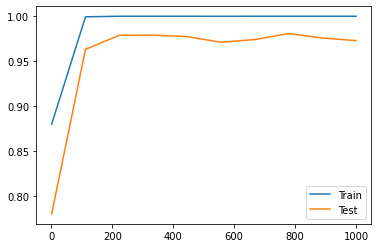

In [ ]:
draw_learning_curve(param_values)

Tidak perlu dioptimize

## Randomized Search CV

In [ ]:
mlp_gs = MLPClassifier(hidden_layer_sizes=889,alpha=0.0163)
parameter_space = {'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive']
}
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=10)
clf.fit(X_train, y_train)
print(print(clf.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'solver': 'adam', 'learning_rate': 'adaptive', 'activation': 'relu'}
None


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
random_cv_nn = {'solver': 'adam', 'learning_rate': 'adaptive', 'activation': 'relu'}

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver = 'adam', learning_rate ='adaptive', activation = 'relu',hidden_layer_sizes=889,alpha=0.0163 )

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nn_grid = accuracy_score(pred_train,label_train)
accuracy_test_nn_grid = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nn_grid = precision_score(pred_train,label_train)
precision_test_nn_grid = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nn_grid = recall_score(pred_train,label_train)
recall_test_nn_grid = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nn_grid = f1_score(pred_train,label_train)
f1_test_nn_grid = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nn_grid = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nn_grid = metrics.auc(fpr,tpr)
auc_overfitting_nn_grid = auc_test_nn_grid-auc_train_nn_grid


print('precision test :',precision_test_nn_grid*100,'%')
print('precision train :',(precision_train_nn_grid)*100,'%')
print('AUC test :',auc_test_nn_grid*100,'%')
print('AUC train :',auc_train_nn_grid*100,'%')

precision test : 80.11049723756905 %
precision train : 99.51890034364261 %
AUC test : 97.53982950980242 %
AUC train : 99.99367036289132 %


C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Feature Importance

In [ ]:
import eli5 as eli

In [ ]:
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(clf,n_iter=100).fit(features_train,label_train)
eli5.show_weights(perm, feature_names = features_train.columns.tolist())

Weight,Feature
0.1960 ± 0.0073,Married
0.1640 ± 0.0061,Salaried
0.1626 ± 0.0074,Small Business
0.1388 ± 0.0059,Manager
0.1112 ± 0.0050,Divorced
0.0954 ± 0.0057,Executive
0.0752 ± 0.0048,Single
0.0738 ± 0.0042,Unmarried
0.0716 ± 0.0046,Passport
0.0654 ± 0.0037,Senior Manager


## impact for Business Metrics

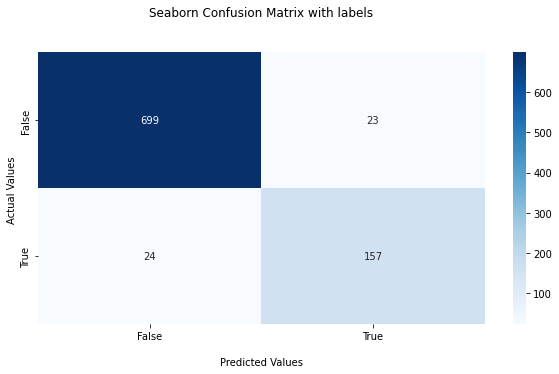

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
biaya_menghubungi_customer = 100
total_sampel = 903
sampel_positif = 157+23
biaya_marketing = total_sampel*biaya_menghubungi_customer
biaya_marketing_model = sampel_positif*biaya_menghubungi_customer
penghematan_model = (1-(biaya_marketing_model)/biaya_marketing)
print(penghematan_model*100,'%')

80.06644518272425 %


In [ ]:
X_test_col = X_test.copy()

In [ ]:
X_test_col['y_test'] = label_test
X_test_col['y_pred'] = pred_test

In [ ]:
jumlah_penerima_conventional = X_test_col[X_test_col['y_test']==1]
jumlah_penerima_model = X_test_col[(X_test_col['y_test']==1)&(X_test_col['y_pred']==1)]

In [ ]:
jumlah_penerima_conventional['ProductPitched'].value_counts()

0    113
2     33
1     29
3      4
4      2
Name: ProductPitched, dtype: int64

In [ ]:
efisiensi_conventional = (113*100+33*300+29*200+4*400+2*500 )/biaya_marketing
efisiensi_conventional*100

32.779623477297896

In [ ]:
jumlah_penerima_model ['ProductPitched'].value_counts()

0    103
1     25
2     23
3      4
4      2
Name: ProductPitched, dtype: int64

In [ ]:
efisiensi_model = (103*100+25*200+23*300+4*400+2*500 )/biaya_marketing_model
efisiensi_model*100

137.77777777777777

In [ ]:
X_train_business, X_test_business, y_train_business,y_test_business = train_test_split(X,y,test_size=0.2, random_state=21)

In [ ]:
X_test_business['y_test'] = label_test
X_test_business['y_pred'] = pred_test

In [ ]:
pelanggan_penerima_conventional = X_test_business
pelanggan_penerima_model = X_test_business[(X_test_business['y_pred']==1)]

In [ ]:
biaya_conv = pelanggan_penerima_conventional['DurationOfPitch'].sum()*0.8
biaya_model = pelanggan_penerima_model['DurationOfPitch'].sum()*0.8

In [ ]:
biaya_conv

11275.2

In [ ]:
biaya_model

2531.2000000000003

In [ ]:
penghematan_model = (1-biaya_model/biaya_conv)*100
penghematan_model

77.55073080743578

In [ ]:
efisiensi_conventional = (113*100+33*300+29*200+4*400+2*500 )/biaya_conv
efisiensi_conventional*100

262.52305945792534

In [ ]:
efisiensi_model = (103*100+25*200+23*300+4*400+2*500 )/biaya_model
efisiensi_model*100

979.772439949431